In [1]:
import yfinance as yf
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Complete list of 297 NSE tickers
tickers = [
    'ABB.NS','ABBOTINDIA.NS','ACC.NS','ADANIENT.NS','APOLLOHOSP.NS','APOLLOTYRE.NS','ASHOKLEY.NS',
    'ASIANPAINT.NS','AUROPHARMA.NS','AXISBANK.NS','BAJAJ-AUTO.NS','BAJAJFINSV.NS','BAJAJHLDNG.NS',
    'BAJFINANCE.NS','BANKBARODA.NS','BEL.NS','BERGEPAINT.NS','BHARATFORG.NS','BHARTIARTL.NS',
    'BHEL.NS','BIOCON.NS','BOSCHLTD.NS','BPCL.NS','BRITANNIA.NS','CANBK.NS','CHOLAFIN.NS','CIPLA.NS',
    'COFORGE.NS','COLPAL.NS','CRISIL.NS','DABUR.NS','DALBHARAT.NS','DEEPAKNTR.NS','DIVISLAB.NS',
    'DLF.NS','DMART.NS','DRREDDY.NS','EICHERMOT.NS','ESCORTS.NS','GAIL.NS','GLAXO.NS','GODREJCP.NS',
    'GODREJPROP.NS','GRASIM.NS','HAVELLS.NS','HCLTECH.NS','HDFC.NS','HDFCBANK.NS','HEROMOTOCO.NS',
    'HINDALCO.NS','HINDPETRO.NS','HINDUNILVR.NS','HINDZINC.NS', 'ICICIBANK.NS', 'IDBI.NS', 'IDEA.NS',
    'IDFCFIRSTB.NS', 'INDHOTEL.NS', 'INDUSINDBK.NS', 'INFY.NS', 'IOB.NS', 'IOC.NS', 'IPCALAB.NS', 'ITC.NS',
    'JINDALSTEL.NS', 'JSWENERGY.NS', 'JSWSTEEL.NS','KOTAKBANK.NS', 'LICHSGFIN.NS', 'LT.NS', 'LTI.NS',
    'LTTS.NS','M&M.NS','M&MFIN.NS','MARICO.NS','MARUTI.NS','MCDOWELL-N.NS','MOTHERSON.NS','MPHASIS.NS',
    'MRF.NS', 'NESTLEIND.NS', 'NTPC.NS','OBEROIRLTY.NS','OFSS.NS','OIL.NS','ONGC.NS', 'PATANJALI.NS',
    'PERSISTENT.NS','PGHH.NS','PIDILITIND.NS','PNB.NS','POLYCAB.NS','RELIANCE.NS','SAIL.NS',
    'SBIN.NS','SCHAEFFLER.NS','SHREECEM.NS','SIEMENS.NS','SRF.NS','SRTRANSFIN.NS','SUNDARMFIN.NS',
    'SUNDRMFAST.NS', 'SUNPHARMA.NS', 'SUPREMEIND.NS', 'TATACHEM.NS', 'TATACOMM.NS', 'TATACONSUM.NS',
    'TATAELXSI.NS','TATAMOTORS.NS','TATAPOWER.NS','TATASTEEL.NS','TCS.NS','TECHM.NS',
    'THERMAX.NS','TITAN.NS','TORNTPHARM.NS','TORNTPOWER.NS','TRENT.NS','ULTRACEMCO.NS','UNIONBANK.NS',
    'VEDL.NS','VOLTAS.NS','WIPRO.NS','YESBANK.NS','ZEEL.NS',
    
    'ADANIGREEN.NS','ADANIPORTS.NS','ADANITRANS.NS','AEGISCHEM.NS','APTECHT.NS','BAJAJELEC.NS',
    'BALRAMCHIN.NS','BASF.NS','BATAINDIA.NS','BEML.NS','BIRLACORPN.NS','BLUEDART.NS','BRIGADE.NS',
    'BSOFT.NS','CANFINHOME.NS','CARBORUNIV.NS','CENTURYTEX.NS','CESC.NS','CHOLAHLDNG.NS','CUB.NS',
    'CYIENT.NS','DCMFINSERV.NS','DEEPAKFERT.NS','DIXON.NS','EIDPARRY.NS','EIHOTEL.NS','ELGIEQUIP.NS',
    'ESABINDIA.NS','FACT.NS','FINCABLES.NS','FINPIPE.NS','GESHIP.NS','GNFC.NS','GODFRYPHLP.NS',
    'GODREJIND.NS', 'GPIL.NS', 'HGS.NS', 'IBREALEST.NS', 'INDIACEM.NS', 'INDIAMART.NS', 'INGERRAND.NS',
    'ITI.NS', 'JKPAPER.NS', 'JSL.NS', 'KARURVYSYA.NS', 'KEC.NS', 'KSB.NS', 'MAHINDCIE.NS', 'MAHLIFE.NS',
    'MAHSCOOTER.NS','MASTEK.NS','MHRIL.NS','NATCOPHARM.NS','NATIONALUM.NS','NBCC.NS','NCC.NS',
    'PFIZER.NS', 'PGHL.NS', 'PRESTIGE.NS', 'PVR.NS', 'RADICO.NS', 'RAYMOND.NS', 'RENUKA.NS', 'SONATSOFTW.NS',
    'SUNTV.NS','TATAINVEST.NS','TTML.NS','TV18BRDCST.NS','WELSPUNIND.NS','WHIRLPOOL.NS',
    
    'ADANIPOWER.NS','AMJLAND.NS','ANSALAPI.NS','ANSALHSG.NS','ARCHIDPLY.NS','ARVIND.NS','ASHIANA.NS', 'ASHOKA.NS', 
    'ASIANHOTNR.NS', 'ATLANTA.NS', 'BAJAJCON.NS', 'BAJAJHIND.NS', 'BALMLAWRIE.NS','BINDALAGRO.NS',
    'BIRLACABLE.NS','BLBLIMITED.NS','BOMDYEING.NS','CONSOFINVT.NS', 'COSMOFIRST.NS', 'COUNCODOS.NS', 'DCBBANK.NS', 
    'DCW.NS', 'DHAMPURSUG.NS', 'ELECTCAST.NS', 'EMAMIREAL.NS', 'FMGOETZE.NS', 'FOSECOIND.NS', 'GENUSPOWER.NS', 
    'GHCL.NS', 'GICHSGFIN.NS','GIPCL.NS','GSFC.NS','GUJALKALI.NS','HARRMALAYA.NS','HCC.NS','HEG.NS','HIMATSEIDE.NS',
    'HINDMOTORS.NS', 'HONDAPOWER.NS','HUBTOWN.NS', 'ICIL.NS', 'IFBAGRO.NS', 'IFBIND.NS', 'IFCI.NS', 'IVC.NS',
    'JAYBARMARU.NS','JAYNECOIND.NS','JCHAC.NS','JINDALPOLY.NS','JINDALSAW.NS','JMCPROJECT.NS', 'JPASSOCIAT.NS', 
    'KAKATCEM.NS', 'KECL.NS', 'KESORAMIND.NS', 'KOLTEPATIL.NS', 'KOTARISUG.NS', 'KOTHARIPET.NS','KOTHARIPRO.NS',
    'KTKBANK.NS','LUMAXIND.NS','MAHEPC.NS','MAHLOG.NS', 'MAHSEAMLES.NS','MARALOVER.NS','MIRCELECTR.NS','MTNL.NS',
    'NAGAFERT.NS','NAHARINDUS.NS','NAHARSPING.NS','NDTV.NS','NOCIL.NS','PENINLAND.NS','PGEL.NS','PGIL.NS',
    'POLYPLEX.NS','PRAKASH.NS','PRIMESECU.NS','RAJSREESUG.NS','RAMANEWS.NS','RELCAPITAL.NS','RIIL.NS','ROLTA.NS',
    'RUCHINFRA.NS','RUCHIRA.NS','SAKHTISUG.NS','SHANTIGEAR.NS','SHYAMTEL.NS','SILINV.NS','SIYSIL.NS','SPIC.NS',
    'SURYAROSNI.NS','SWARAJENG.NS','TATAMETALI.NS','TFCILTD.NS','THOMASCOOK.NS','TIMESGTY.NS', 'TIRUMALCHM.NS',
    'TNPETRO.NS','UCALFUEL.NS','UNITECH.NS','VENKEYS.NS','VESUVIUS.NS','VSTIND.NS', 'ZEEMEDIA.NS'
]

In [2]:
len(tickers)

300

In [3]:
nifty50_tickers = [
    'ADANIPORTS.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BHARTIARTL.NS', 'BPCL.NS',
    'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS','EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFC.NS',
    'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS','INDUSINDBK.NS', 'INFY.NS',
    'IOC.NS', 'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS',
    'POWERGRID.NS', 'RELIANCE.NS', 'SBILIFE.NS','SBIN.NS', 'SHREECEM.NS','SUNPHARMA.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS',
    'TCS.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS', 'WIPRO.NS']

In [4]:
# Define the date range for the dataset
start_date = '2021-04-01'
end_date = '2022-03-31'

# Create a dictionary to hold the dataframes for each ticker
stock_data = {}

In [5]:
nifty50_marketdata = yf.download(nifty50_tickers, start = start_date, end = end_date)

[*********************100%%**********************]  48 of 49 completed

1 Failed download:
['HDFC.NS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-04-01 -> 2022-03-31)')
[*********************100%%**********************]  48 of 49 completed

In [6]:
nifty50_marketdata.head()

Price          Adj Close                                          \
Ticker     ADANIPORTS.NS ASIANPAINT.NS AXISBANK.NS BAJAJ-AUTO.NS   
Date                                                               
2021-04-01    721.249084   2497.003418  711.190552   3383.459473   
2021-04-05    727.126831   2456.785400  683.510986   3252.796143   
2021-04-06    818.525818   2555.569336  676.179688   3268.163086   
2021-04-07    798.149658   2572.204834  686.503418   3326.647217   
2021-04-08    806.231506   2593.781494  679.870239   3299.167969   

Price                                                                          \
Ticker     BAJAJFINSV.NS BAJFINANCE.NS BHARTIARTL.NS     BPCL.NS BRITANNIA.NS   
Date                                                                            
2021-04-01    977.844971   5222.357910    506.612976  367.592834  3427.524902   
2021-04-05    947.094666   4915.632324    513.859985  359.735046  3505.055176   
2021-04-06    950.875427   4945.943359    517.702393  359.777069  3533.708496   
2021-04-07    952.883179   5029.149902    526.846313  359.861115  3607.544678   
2021-04-08    964.390137   4981.999512    528.208191  361.836060  3675.139893   

Price                   ...      Volume                             \
Ticker        CIPLA.NS  ... SHREECEM.NS SUNPHARMA.NS TATAMOTORS.NS   
Date                    ...                                          
2021-04-01  803.360229  ...       52771      6033653      44088352   
2021-04-05  804.783752  ...      124392      5353987      66178755   
2021-04-06  820.884460  ...       52886      7444994      63031783   
2021-04-07  825.498535  ...       40554      4757224      39073986   
2021-04-08  826.627625  ...      148094      3222479      62459774   

Price                                                                      \
Ticker     TATASTEEL.NS   TCS.NS TECHM.NS TITAN.NS ULTRACEMCO.NS   UPL.NS   
Date                                                                        
2021-04-01    368420980  4285076  3555291  1343989        531749  7348750   
2021-04-05    305759860  5317862  5118272  1376233        540954  9077724   
2021-04-06    207789200  2291562  2395572  1400544        508328  7227685   
2021-04-07    171132080  2491268  2974419  2592185        301479  4948757   
2021-04-08    530630560  2578118  6737118  2085919        635298  3926359   

Price                 
Ticker      WIPRO.NS  
Date                  
2021-04-01   7596943  
2021-04-05  21216395  
2021-04-06   8320520  
2021-04-07  13867650  
2021-04-08  12916614  

[5 rows x 294 columns]

In [7]:
stockdata = yf.download(tickers, start = start_date, end = end_date)

[*********************100%%**********************]  300 of 300 completed

11 Failed downloads:
['LTI.NS', 'WELSPUNIND.NS', 'MAHINDCIE.NS', 'PVR.NS', 'ATLANTA.NS', 'SRTRANSFIN.NS', 'ADANITRANS.NS', 'UCALFUEL.NS', 'BINDALAGRO.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')
['TATAMETALI.NS', 'HDFC.NS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2021-04-01 -> 2022-03-31)')


In [8]:
stockdata.head()

Price         Adj Close                                                        \
Ticker           ABB.NS ABBOTINDIA.NS       ACC.NS  ADANIENT.NS ADANIGREEN.NS   
Date                                                                            
2021-04-01  1379.999146  14662.901367  1852.297729  1105.443115   1160.050049   
2021-04-05  1364.890747  14839.188477  1833.952393  1136.443848   1164.199951   
2021-04-06  1357.237671  14893.854492  1847.553955  1223.455566   1194.449951   
2021-04-07  1357.780884  14990.318359  1857.234863  1163.700562   1196.199951   
2021-04-08  1378.814087  14646.553711  1918.418335  1160.655396   1165.500000   

Price                                                                         \
Ticker     ADANIPORTS.NS ADANIPOWER.NS ADANITRANS.NS AEGISCHEM.NS AMJLAND.NS   
Date                                                                           
2021-04-01    721.249084     89.300003           NaN   285.644196  21.946171   
2021-04-05    727.126831     93.750000           NaN   273.175446  22.631990   
2021-04-06    818.525818     98.400002           NaN   266.443268  22.583002   
2021-04-07    798.149658     99.949997           NaN   276.778564  22.436041   
2021-04-08    806.231506     97.400002           NaN   276.304474  23.023886   

Price       ...     Volume                                                \
Ticker      ... VENKEYS.NS VESUVIUS.NS VOLTAS.NS VSTIND.NS WELSPUNIND.NS   
Date        ...                                                            
2021-04-01  ...      61964       12883    803202      3980           NaN   
2021-04-05  ...      64107        7160   1567700      6468           NaN   
2021-04-06  ...      27510       13480   1757333      5140           NaN   
2021-04-07  ...      34530       55328   3176468      3996           NaN   
2021-04-08  ...     299418       20217   1155524      2584           NaN   

Price                                                               
Ticker     WHIRLPOOL.NS  WIPRO.NS YESBANK.NS   ZEEL.NS ZEEMEDIA.NS  
Date                                                                
2021-04-01        91390   7596943   93196660   8509692      962945  
2021-04-05        54404  21216395   83064018  14387268     1853516  
2021-04-06       131557   8320520   59808985   8767242     1684870  
2021-04-07        90517  13867650   50497122  12421910      853129  
2021-04-08        87599  12916614   45104506   8695941     1140106  

[5 rows x 1800 columns]

In [9]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2021-04-01 to 2022-03-30
Columns: 1800 entries, ('Adj Close', 'ABB.NS') to ('Volume', 'ZEEMEDIA.NS')
dtypes: float64(1511), int64(289)
memory usage: 3.4 MB


In [10]:
stockdata.columns

MultiIndex([('Adj Close',        'ABB.NS'),
            ('Adj Close', 'ABBOTINDIA.NS'),
            ('Adj Close',        'ACC.NS'),
            ('Adj Close',   'ADANIENT.NS'),
            ('Adj Close', 'ADANIGREEN.NS'),
            ('Adj Close', 'ADANIPORTS.NS'),
            ('Adj Close', 'ADANIPOWER.NS'),
            ('Adj Close', 'ADANITRANS.NS'),
            ('Adj Close',  'AEGISCHEM.NS'),
            ('Adj Close',    'AMJLAND.NS'),
            ...
            (   'Volume',    'VENKEYS.NS'),
            (   'Volume',   'VESUVIUS.NS'),
            (   'Volume',     'VOLTAS.NS'),
            (   'Volume',     'VSTIND.NS'),
            (   'Volume', 'WELSPUNIND.NS'),
            (   'Volume',  'WHIRLPOOL.NS'),
            (   'Volume',      'WIPRO.NS'),
            (   'Volume',    'YESBANK.NS'),
            (   'Volume',       'ZEEL.NS'),
            (   'Volume',   'ZEEMEDIA.NS')],
           names=['Price', 'Ticker'], length=1800)

In [11]:
validation_start_date = '2022-04-01'
validation_end_date = '2022-09-30'
validation_stock_data = {}

validation_stock_data = yf.download(tickers, start = validation_start_date, end = validation_end_date)

[*********************100%%**********************]  300 of 300 completed

11 Failed downloads:
['WELSPUNIND.NS', 'LTI.NS', 'PVR.NS', 'MAHINDCIE.NS', 'ATLANTA.NS', 'SRTRANSFIN.NS', 'ADANITRANS.NS', 'UCALFUEL.NS', 'BINDALAGRO.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')
['TATAMETALI.NS', 'HDFC.NS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-04-01 -> 2022-09-30)')


In [12]:
validation_stock_data

Price         Adj Close                                                        \
Ticker           ABB.NS ABBOTINDIA.NS       ACC.NS  ADANIENT.NS ADANIGREEN.NS   
Date                                                                            
2022-04-01  2095.462646  17294.957031  2082.364502  2041.761475   1945.099976   
2022-04-04  2111.567871  17331.693359  2108.680176  2063.940918   2110.449951   
2022-04-05  2187.882080  17409.369141  2138.726562  2137.872803   2189.800049   
2022-04-06  2189.764648  17456.673828  2134.597900  2158.004150   2197.399902   
2022-04-07  2172.618896  17938.712891  2125.842529  2097.110352   2166.000000   
...                 ...           ...          ...          ...           ...   
2022-09-23  3104.543213  17744.357422  2476.252686  3672.465332   2323.850098   
2022-09-26  2982.881104  17478.445312  2366.165039  3584.409180   2210.350098   
2022-09-27  3013.234375  17970.064453  2361.389404  3557.322754   2146.300049   
2022-09-28  2990.333008  18029.050781  2338.357178  3546.977783   2051.050049   
2022-09-29  2976.919678  19063.574219  2361.986572  3468.966797   2004.050049   

Price                                                                         \
Ticker     ADANIPORTS.NS ADANIPOWER.NS ADANITRANS.NS AEGISCHEM.NS AMJLAND.NS   
Date                                                                           
2022-04-01    775.133118    203.449997           NaN   211.802750  31.443693   
2022-04-04    807.489868    211.949997           NaN   210.258835  31.394407   
2022-04-05    836.591309    233.100006           NaN   207.701782  30.507282   
2022-04-06    838.366943    244.750000           NaN   212.671188  31.197268   
2022-04-07    806.355469    232.550003           NaN   219.956421  33.513653   
...                  ...           ...           ...          ...        ...   
2022-09-23    907.697815    385.600006           NaN   269.843262  29.353979   
2022-09-26    857.634399    366.500000           NaN   256.514679  27.168573   
2022-09-27    838.562622    372.549988           NaN   258.076965  27.267910   
2022-09-28    821.576782    367.750000           NaN   255.049957  26.969900   
2022-09-29    810.948242    369.450012           NaN   256.612244  27.019569   

Price       ...     Volume                                                \
Ticker      ... VENKEYS.NS VESUVIUS.NS VOLTAS.NS VSTIND.NS WELSPUNIND.NS   
Date        ...                                                            
2022-04-01  ...     161549        6117    440336      2700           NaN   
2022-04-04  ...      64888        2324    744419      5178           NaN   
2022-04-05  ...     118431        6002   1996418      5526           NaN   
2022-04-06  ...      63941        5235   1222732     13239           NaN   
2022-04-07  ...      45546        5616   2230037      4559           NaN   
...         ...        ...         ...       ...       ...           ...   
2022-09-23  ...      14450       27544   1626446      4682           NaN   
2022-09-26  ...      19035       46685   1908668      6839           NaN   
2022-09-27  ...      13786       10512   1333677     10876           NaN   
2022-09-28  ...      11990       18193    851509      1856           NaN   
2022-09-29  ...      23697       23602    944566      5446           NaN   

Price                                                              
Ticker     WHIRLPOOL.NS WIPRO.NS YESBANK.NS   ZEEL.NS ZEEMEDIA.NS  
Date                                                               
2022-04-01       166665  4283997   87342736  13698030     3487444  
2022-04-04       173747  4427974  114480211  12108609     5049710  
2022-04-05       541878  6431244   91829702   9511869     5602982  
2022-04-06       183047  4117951  559694362  21387631     5476321  
2022-04-07       362664  7860765  894347658  67870863     9847555  
...                 ...      ...        ...       ...         ...  
2022-09-23       105625  6983355  104057075  18790529     1092330  

In [13]:
stockdata = stockdata.stack().reset_index().rename(index=str, columns={"level_1": "Ticker"}).sort_values(['Ticker','Date'])
stockdata.set_index('Date', inplace=True)

In [14]:
stockdata

Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2021-04-01,ABB.NS,1379.999146,1397.500000,1424.699951,1391.099976,1413.800049,80643.0
2021-04-05,ABB.NS,1364.890747,1382.199951,1400.000000,1365.150024,1390.000000,88800.0
2021-04-06,ABB.NS,1357.237671,1374.449951,1395.550049,1360.000000,1384.000000,100694.0
2021-04-07,ABB.NS,1357.780884,1375.000000,1389.900024,1366.750000,1375.000000,37217.0
2021-04-08,ABB.NS,1378.814087,1396.300049,1405.500000,1375.199951,1377.849976,47375.0
...,...,...,...,...,...,...,...
2022-03-24,ZEEMEDIA.NS,15.950000,15.950000,15.950000,15.600000,15.650000,2483187.0
2022-03-25,ZEEMEDIA.NS,16.150000,16.150000,16.700001,15.950000,16.350000,5255349.0
2022-03-28,ZEEMEDIA.NS,15.800000,15.800000,16.400000,15.550000,16.200001,2708169.0


In [15]:
validation_stock_data = validation_stock_data.stack().reset_index().rename(index=str, columns={"level_1": "Ticker"}).sort_values(['Ticker','Date'])
validation_stock_data.set_index('Date', inplace=True)

In [16]:
validation_stock_data

Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2022-04-01,ABB.NS,2095.462646,2114.300049,2155.000000,2101.000000,2155.000000,180591.0
2022-04-04,ABB.NS,2111.567871,2130.550049,2143.899902,2096.000000,2096.000000,105731.0
2022-04-05,ABB.NS,2187.882080,2207.550049,2264.949951,2127.949951,2140.000000,350006.0
2022-04-06,ABB.NS,2189.764648,2209.449951,2243.949951,2173.850098,2219.000000,202906.0
2022-04-07,ABB.NS,2172.618896,2192.149902,2237.850098,2181.649902,2210.000000,98294.0
...,...,...,...,...,...,...,...
2022-09-23,ZEEMEDIA.NS,16.200001,16.200001,17.400000,16.150000,16.750000,1092330.0
2022-09-26,ZEEMEDIA.NS,16.450001,16.450001,17.000000,15.500000,16.549999,801119.0
2022-09-27,ZEEMEDIA.NS,16.600000,16.600000,17.250000,15.950000,16.450001,1011586.0


In [17]:
nifty50_marketdata = nifty50_marketdata.stack().reset_index().rename(index=str, columns={"level_1": "Ticker"}).sort_values(['Ticker','Date'])
nifty50_marketdata.set_index('Date', inplace=True)

In [18]:
nifty50_marketdata

Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2021-04-01,ADANIPORTS.NS,721.249084,736.250000,742.000000,705.000000,713.500000,15017049.0
2021-04-05,ADANIPORTS.NS,727.126831,742.250000,745.000000,715.000000,731.750000,15622924.0
2021-04-06,ADANIPORTS.NS,818.525818,835.549988,852.700012,743.000000,756.000000,64555516.0
2021-04-07,ADANIPORTS.NS,798.149658,814.750000,885.000000,795.000000,857.000000,97717880.0
2021-04-08,ADANIPORTS.NS,806.231506,823.000000,838.000000,806.000000,818.000000,34025873.0
...,...,...,...,...,...,...,...
2022-03-24,WIPRO.NS,602.735962,610.549988,613.799988,605.799988,607.000000,3875745.0
2022-03-25,WIPRO.NS,595.628113,603.349976,614.000000,597.250000,611.000000,5993097.0
2022-03-28,WIPRO.NS,592.518433,600.200012,609.000000,597.099976,608.000000,5738405.0


In [19]:
validation_stock_data.to_csv('validation_stock_data_april2022_september2022.csv')

In [20]:
stockdata.to_csv('stock_data_april2021_march2022.csv')

In [21]:
nifty50_marketdata.to_csv('nifty50_data_april2021_march2022.csv')

In [22]:
validation_stock_data[validation_stock_data['Ticker']=='TCS.NS']

Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2022-04-01,TCS.NS,3552.466797,3758.750000,3763.000000,3728.050049,3748.000000,1387014.0
2022-04-04,TCS.NS,3563.430176,3770.350098,3780.000000,3737.100098,3762.000000,1472994.0
2022-04-05,TCS.NS,3605.441162,3814.800049,3835.600098,3772.000000,3772.000000,2314947.0
2022-04-06,TCS.NS,3549.253662,3755.350098,3809.300049,3731.149902,3809.300049,2051729.0
2022-04-07,TCS.NS,3481.961182,3684.149902,3745.500000,3679.000000,3745.500000,2494829.0
...,...,...,...,...,...,...,...
2022-09-23,TCS.NS,2844.867188,2982.050049,3022.500000,2979.000000,3004.000000,2652374.0
2022-09-26,TCS.NS,2856.649170,2994.399902,3025.850098,2926.100098,2959.850098,2925489.0
2022-09-27,TCS.NS,2878.638428,3017.449951,3025.000000,2976.000000,3009.399902,2227447.0


In [23]:
stockdata[stockdata['Ticker']=='TCS.NS']

Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2021-04-01,TCS.NS,2959.370605,3165.000000,3215.000000,3145.000000,3191.100098,4285076.0
2021-04-05,TCS.NS,3028.469482,3238.899902,3263.000000,3151.000000,3171.000000,5317862.0
2021-04-06,TCS.NS,3052.593262,3264.699951,3275.000000,3230.000000,3275.000000,2291562.0
2021-04-07,TCS.NS,3058.857910,3271.399902,3277.550049,3234.800049,3259.000000,2491268.0
2021-04-08,TCS.NS,3101.822754,3317.350098,3335.000000,3266.050049,3270.000000,2578118.0
...,...,...,...,...,...,...,...
2022-03-24,TCS.NS,3544.055664,3749.850098,3758.199951,3695.000000,3700.000000,1879046.0
2022-03-25,TCS.NS,3503.982666,3707.449951,3779.500000,3672.000000,3759.899902,1690133.0
2022-03-28,TCS.NS,3504.218262,3707.699951,3713.000000,3661.199951,3695.000000,1760990.0


In [24]:
s  = stockdata

In [25]:
s[s['Ticker']=='TCS.NS']['Close']

Date
2021-04-01    3165.000000
2021-04-05    3238.899902
2021-04-06    3264.699951
2021-04-07    3271.399902
2021-04-08    3317.350098
                 ...     
2022-03-24    3749.850098
2022-03-25    3707.449951
2022-03-28    3707.699951
2022-03-29    3705.350098
2022-03-30    3731.550049
Name: Close, Length: 247, dtype: float64

In [26]:
pivoted_df_close = s.reset_index().pivot(index= 'Date', columns='Ticker', values='Close')
pivoted_df_close

Ticker,ABB.NS,ABBOTINDIA.NS,ACC.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ADANIPOWER.NS,AEGISCHEM.NS,AMJLAND.NS,ANSALAPI.NS,...,VEDL.NS,VENKEYS.NS,VESUVIUS.NS,VOLTAS.NS,VSTIND.NS,WHIRLPOOL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS,ZEEMEDIA.NS
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-01,1397.500000,14980.049805,1913.349976,1107.199951,1160.050049,736.250000,89.300003,301.250000,22.400000,6.15,...,231.250000,1566.849976,995.299988,1005.950012,3363.850098,2223.649902,416.399994,15.70,209.250000,6.50
2021-04-05,1382.199951,15160.150391,1894.400024,1138.250000,1164.199951,742.250000,93.750000,288.100006,23.100000,6.40,...,231.750000,1565.449951,982.400024,976.700012,3297.149902,2189.500000,425.450012,15.50,202.149994,6.40
2021-04-06,1374.449951,15216.000000,1908.449951,1225.400024,1194.449951,835.549988,98.400002,281.000000,23.049999,6.70,...,233.550003,1564.699951,994.799988,974.750000,3375.800049,2186.550049,427.149994,15.60,199.899994,6.45
2021-04-07,1375.000000,15314.549805,1918.449951,1165.550049,1196.199951,814.750000,99.949997,291.899994,22.900000,7.00,...,236.850006,1567.550049,1048.250000,999.549988,3374.100098,2179.300049,438.000000,15.60,200.399994,6.45
2021-04-08,1396.300049,14963.349609,1981.650024,1162.500000,1165.500000,823.000000,97.400002,291.399994,23.500000,6.70,...,237.750000,1621.699951,1064.650024,1004.250000,3371.500000,2196.199951,442.100006,15.55,201.949997,6.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-24,2038.650024,16469.250000,2080.399902,1832.800049,1911.400024,733.450012,132.149994,202.000000,32.400002,15.20,...,411.149994,2293.050049,1009.750000,1276.199951,3106.899902,1630.550049,610.549988,12.75,298.899994,15.95
2022-03-25,1989.300049,16021.849609,2064.199951,1867.000000,1921.250000,743.250000,143.199997,202.199997,31.250000,14.50,...,410.549988,2291.850098,1001.450012,1249.000000,3056.649902,1591.699951,603.349976,12.70,295.100006,16.15
2022-03-28,2002.900024,16238.750000,2059.649902,1909.699951,1930.849976,737.000000,152.250000,201.399994,30.750000,14.40,...,413.399994,2220.850098,1025.449951,1231.599976,3030.149902,1569.400024,600.200012,12.55,289.899994,15.80


In [27]:
# Calculate daily returns
daily_returns = pivoted_df_close.pct_change().iloc[1:]

# Calculate expected return for each stock
expected_returns = daily_returns.mean()

# Calculate risk (standard deviation) for each stock
risk = daily_returns.std()

# Print expected returns and risks
print("Expected Returns:\n", expected_returns)
print("\nRisks (Standard Deviation):\n", risk)

Expected Returns:
 Ticker
ABB.NS           0.001825
ABBOTINDIA.NS    0.000735
ACC.NS           0.000611
ADANIENT.NS      0.002787
ADANIGREEN.NS    0.002249
                   ...   
WHIRLPOOL.NS    -0.001226
WIPRO.NS         0.001651
YESBANK.NS      -0.000721
ZEEL.NS          0.002200
ZEEMEDIA.NS      0.004268
Length: 289, dtype: float64

Risks (Standard Deviation):
 Ticker
ABB.NS           0.020158
ABBOTINDIA.NS    0.017663
ACC.NS           0.016453
ADANIENT.NS      0.027938
ADANIGREEN.NS    0.025925
                   ...   
WHIRLPOOL.NS     0.018377
WIPRO.NS         0.017942
YESBANK.NS       0.024255
ZEEL.NS          0.042974
ZEEMEDIA.NS      0.035917
Length: 289, dtype: float64


In [28]:
pivoted_df_volume = s.reset_index().pivot(index= 'Date', columns='Ticker', values='Volume')
pivoted_df_volume

Ticker,ABB.NS,ABBOTINDIA.NS,ACC.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ADANIPOWER.NS,AEGISCHEM.NS,AMJLAND.NS,ANSALAPI.NS,...,VEDL.NS,VENKEYS.NS,VESUVIUS.NS,VOLTAS.NS,VSTIND.NS,WHIRLPOOL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS,ZEEMEDIA.NS
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-01,80643.0,21203.0,765296.0,12713083.0,523216.0,15017049.0,43478357.0,299812.0,7112.0,746850.0,...,10398919.0,61964.0,12883.0,803202.0,3980.0,91390.0,7596943.0,93196660.0,8509692.0,962945.0
2021-04-05,88800.0,10230.0,1272161.0,15795720.0,822644.0,15622924.0,26119543.0,219748.0,7117.0,532976.0,...,14527112.0,64107.0,7160.0,1567700.0,6468.0,54404.0,21216395.0,83064018.0,14387268.0,1853516.0
2021-04-06,100694.0,15326.0,965415.0,21496457.0,574032.0,64555516.0,3367192.0,469669.0,14665.0,46604.0,...,17652029.0,27510.0,13480.0,1757333.0,5140.0,131557.0,8320520.0,59808985.0,8767242.0,1684870.0
2021-04-07,37217.0,10456.0,1643523.0,23007694.0,572004.0,97717880.0,60992792.0,217740.0,4919.0,129009.0,...,42365445.0,34530.0,55328.0,3176468.0,3996.0,90517.0,13867650.0,50497122.0,12421910.0,853129.0
2021-04-08,47375.0,18239.0,948277.0,12404773.0,462142.0,34025873.0,19905893.0,418077.0,2757.0,203477.0,...,24821045.0,299418.0,20217.0,1155524.0,2584.0,87599.0,12916614.0,45104506.0,8695941.0,1140106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-24,251286.0,9497.0,294252.0,1030145.0,477913.0,2914647.0,25846110.0,738063.0,85968.0,88450.0,...,11816201.0,32512.0,15217.0,1415928.0,5020.0,238158.0,3875745.0,46327191.0,86772872.0,2483187.0
2022-03-25,100470.0,42490.0,278510.0,1366115.0,579479.0,4003497.0,102500073.0,404556.0,53617.0,1613118.0,...,8213490.0,29329.0,4029.0,1504572.0,6044.0,199302.0,5993097.0,48911163.0,30465535.0,5255349.0
2022-03-28,184576.0,31916.0,231188.0,1895438.0,746161.0,5691095.0,90954944.0,459653.0,23295.0,206183.0,...,8658384.0,62840.0,14978.0,1591299.0,5087.0,203469.0,5738405.0,81110072.0,14722885.0,2708169.0


In [29]:
# Calculate median volume for each stock
median_volume = pivoted_df_volume.median()

# Calculate sum of total volume over the same period
total_volume_sum = pivoted_df_volume.sum().sum()

# Calculate proportionate volume for each stock
proportionate_volume = median_volume / total_volume_sum

print("Proportionate Volumes:\n", proportionate_volume)

Proportionate Volumes:
 Ticker
ABB.NS           3.548494e-07
ABBOTINDIA.NS    3.431058e-08
ACC.NS           9.475045e-07
ADANIENT.NS      6.186039e-06
ADANIGREEN.NS    1.507210e-06
                     ...     
WHIRLPOOL.NS     3.004591e-07
WIPRO.NS         1.505347e-05
YESBANK.NS       2.052846e-04
ZEEL.NS          2.990499e-05
ZEEMEDIA.NS      5.712445e-06
Length: 289, dtype: float64


In [30]:
nifty_data = yf.download('^NSEI', start=start_date, end=end_date)

# Selecting only the 'Close' column
nifty_close = nifty_data['Close']

print(nifty_close)

[*********************100%%**********************]  1 of 1 completed

Date
2021-04-01    14867.349609
2021-04-05    14637.799805
2021-04-06    14683.500000
2021-04-07    14819.049805
2021-04-08    14873.799805
                  ...     
2022-03-24    17222.750000
2022-03-25    17153.000000
2022-03-28    17222.000000
2022-03-29    17325.300781
2022-03-30    17498.250000
Name: Close, Length: 247, dtype: float64


In [31]:
# Calculate daily market returns
daily_returns_m = nifty_close.pct_change().iloc[1:]

# Calculate expected return for each stock
expected_returns_m = daily_returns_m.mean()

# Calculate risk (standard deviation) for each stock
risk_m = daily_returns_m.std()

# Print expected returns and risks
print("Expected Market Returns:\n", expected_returns_m)
print("\nMarket Risks (Standard Deviation):\n", risk_m)

Expected Market Returns:
 0.0007124370628734041

Market Risks (Standard Deviation):
 0.009982583392894479


In [32]:
nifty_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,14798.400391,14883.200195,14692.450195,14867.349609,14867.349609,445000
2021-04-05,14837.700195,14849.849609,14459.500000,14637.799805,14637.799805,509700
2021-04-06,14737.000000,14779.099609,14573.900391,14683.500000,14683.500000,475300
2021-04-07,14716.450195,14879.799805,14649.849609,14819.049805,14819.049805,0
2021-04-08,14875.650391,14984.150391,14821.099609,14873.799805,14873.799805,514800
...,...,...,...,...,...,...
2022-03-24,17094.949219,17291.750000,17091.150391,17222.750000,17222.750000,290300
2022-03-25,17289.000000,17294.900391,17076.550781,17153.000000,17153.000000,237100
2022-03-28,17181.849609,17235.099609,17003.900391,17222.000000,17222.000000,253200


In [33]:
beta = []
covariances = []
for column in daily_returns.columns:
    covariance_matrix = daily_returns[column].cov(daily_returns_m)
    market_variance = daily_returns_m.var()
    beta_factors = covariance_matrix / market_variance
    covariances.append(covariance_matrix)
    beta.append(beta_factors)

print("Covariance Matrix:")
print(len(covariances))
print("\nBeta Factors:\n", len(beta))

Covariance Matrix:
289

Beta Factors:
 289


In [34]:
ticker_df = pd.DataFrame(daily_returns.columns, columns=['Ticker'])
ticker_df

,Ticker
0,ABB.NS
1,ABBOTINDIA.NS
2,ACC.NS
3,ADANIENT.NS
4,ADANIGREEN.NS
...,...
284,WHIRLPOOL.NS
285,WIPRO.NS
286,YESBANK.NS
287,ZEEL.NS


In [35]:
beta_df = pd.DataFrame(beta, columns=['Beta'])
beta_df

,Beta
0,0.478828
1,0.332907
2,0.885932
3,1.573860
4,0.882875
...,...
284,0.497664
285,0.907046
286,0.920635
287,1.103354


In [36]:
beta_df1 = pd.concat([ticker_df, beta_df], axis=1)
beta_df1

,Ticker,Beta
0,ABB.NS,0.478828
1,ABBOTINDIA.NS,0.332907
2,ACC.NS,0.885932
3,ADANIENT.NS,1.573860
4,ADANIGREEN.NS,0.882875
...,...,...
284,WHIRLPOOL.NS,0.497664
285,WIPRO.NS,0.907046
286,YESBANK.NS,0.920635
287,ZEEL.NS,1.103354


In [37]:
print("beta factors:\n", beta_df1)

beta factors:
             Ticker      Beta
0           ABB.NS  0.478828
1    ABBOTINDIA.NS  0.332907
2           ACC.NS  0.885932
3      ADANIENT.NS  1.573860
4    ADANIGREEN.NS  0.882875
..             ...       ...
284   WHIRLPOOL.NS  0.497664
285       WIPRO.NS  0.907046
286     YESBANK.NS  0.920635
287        ZEEL.NS  1.103354
288    ZEEMEDIA.NS  1.042392

[289 rows x 2 columns]


In [38]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [39]:
attributes = pd.DataFrame({
    'Expected Return': expected_returns,
    'Risk': risk,
    'Proportionate Volume': proportionate_volume,
    'Beta Factor': beta
})
attributes

,Expected Return,Risk,Proportionate Volume,Beta Factor
Ticker,,,,
ABB.NS,0.001825,0.020158,3.548494e-07,0.478828
ABBOTINDIA.NS,0.000735,0.017663,3.431058e-08,0.332907
ACC.NS,0.000611,0.016453,9.475045e-07,0.885932
ADANIENT.NS,0.002787,0.027938,6.186039e-06,1.573860
ADANIGREEN.NS,0.002249,0.025925,1.507210e-06,0.882875
...,...,...,...,...
WHIRLPOOL.NS,-0.001226,0.018377,3.004591e-07,0.497664
WIPRO.NS,0.001651,0.017942,1.505347e-05,0.907046
YESBANK.NS,-0.000721,0.024255,2.052846e-04,0.920635


In [40]:
# Standardize the attributes for K-means clustering
scaler = StandardScaler()
attributes_scaled = scaler.fit_transform(attributes)

# Perform K-means clustering
num_clusters = 3  # You can choose the number of clusters based on your analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
attributes['Cluster'] = kmeans.fit_predict(attributes_scaled)

In [41]:
# Print the number of stocks in each cluster
print(attributes['Cluster'].value_counts())

0    147
1    137
2      5
Name: Cluster, dtype: int64


In [42]:
## Large Cap: 0
## Small Cap: 1
## Mid Cap: 2

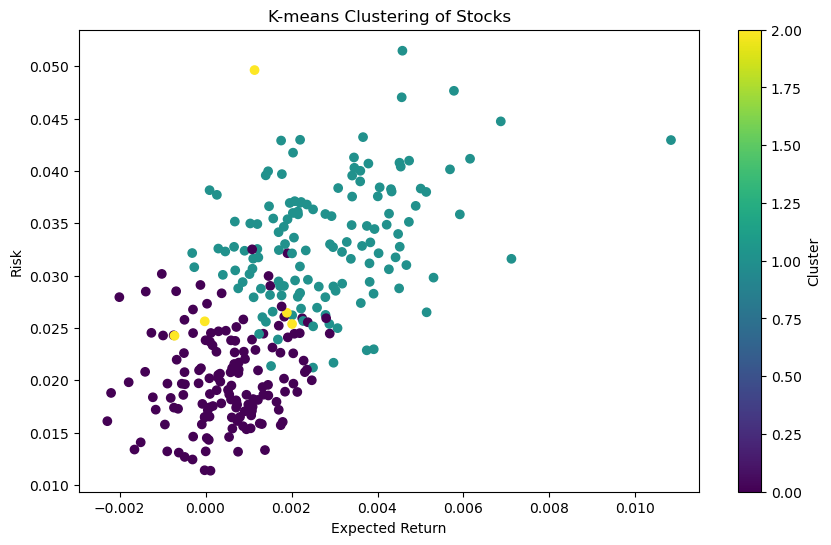

In [43]:
# Plot clusters for visualization
plt.figure(figsize=(10, 6))
plt.scatter(attributes['Expected Return'], attributes['Risk'], c=attributes['Cluster'], cmap='viridis')
plt.xlabel('Expected Return')
plt.ylabel('Risk')
plt.title('K-means Clustering of Stocks')
plt.colorbar(label='Cluster')
plt.show()

In [44]:
# Select a representative stock from each cluster
selected_stocks = attributes.groupby('Cluster').apply(lambda x: x.sample(1)).index.get_level_values(1)

# Print the selected stocks for the diversified portfolio
print("Selected stocks for diversified portfolio:", selected_stocks)

Selected stocks for diversified portfolio: Index(['MARICO.NS', 'DLF.NS', 'TATASTEEL.NS'], dtype='object', name='Ticker')


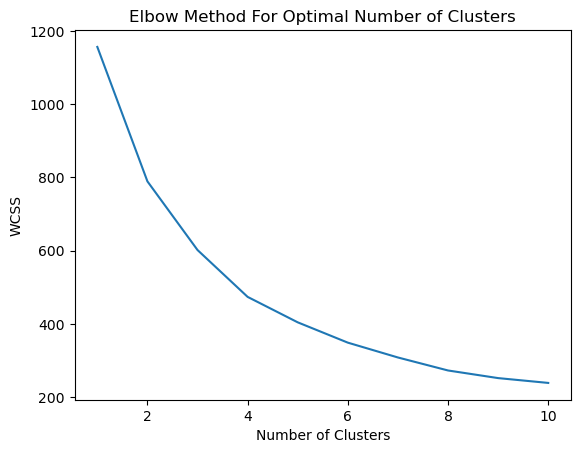

In [45]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(attributes_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [46]:
# Calculate portfolio expected return
weights = np.ones(len(selected_stocks)) / len(selected_stocks)  # Equal weights for simplicity
portfolio_expected_return = sum(weights * expected_returns[selected_stocks])

# Print the portfolio expected return
print("Portfolio Expected Return:", portfolio_expected_return)

Portfolio Expected Return: 0.001461923178450583


In [47]:
# Calculate portfolio risk (variance and volatility)
selected_daily_returns = daily_returns[selected_stocks]
cov_matrix = selected_daily_returns.cov()

# Calculate portfolio variance
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Calculate portfolio volatility (standard deviation)
portfolio_volatility = np.sqrt(portfolio_variance)

# Print the portfolio risk (variance and volatility)
print("Portfolio Variance (Risk):", portfolio_variance)
print("Portfolio Volatility (Standard Deviation):", portfolio_volatility)

Portfolio Variance (Risk): 0.00030349741241385113
Portfolio Volatility (Standard Deviation): 0.017421177124805634


### Portfolio Creation and Optimization

In [48]:
from pypfopt import risk_models, expected_returns, EfficientFrontier

In [49]:
#Selecting stocks Randomly
m = 3
selected_stocks = attributes.groupby('Cluster').apply(lambda x: x.sample(m)).index.get_level_values(1)
print("Selected stocks for diversified portfolio:", selected_stocks)

Selected stocks for diversified portfolio: Index(['GODFRYPHLP.NS', 'EIDPARRY.NS', 'HINDZINC.NS', 'GICHSGFIN.NS',
       'KOTHARIPET.NS', 'ARVIND.NS', 'PNB.NS', 'TATASTEEL.NS', 'IDEA.NS'],
      dtype='object', name='Ticker')


In [50]:
# Calculate portfolio expected return and risk
selected_daily_returns = pivoted_df_close[selected_stocks]

# Calculate expected returns and sample covariance matrix
mu = expected_returns.mean_historical_return(selected_daily_returns, frequency=247) #Number of trading days
S = risk_models.sample_cov(selected_daily_returns)

In [51]:
selected_daily_returns

Ticker,GODFRYPHLP.NS,EIDPARRY.NS,HINDZINC.NS,GICHSGFIN.NS,KOTHARIPET.NS,ARVIND.NS,PNB.NS,TATASTEEL.NS,IDEA.NS
Date,,,,,,,,,
2021-04-01,928.000000,324.350006,280.250000,122.099998,27.250000,69.099998,38.200001,86.305000,10.00
2021-04-05,915.000000,314.299988,297.250000,118.199997,25.650000,66.300003,36.950001,86.775002,9.55
2021-04-06,903.299988,317.549988,301.350006,118.400002,25.900000,66.699997,37.049999,86.285004,9.70
2021-04-07,905.750000,325.250000,307.500000,119.900002,26.000000,68.300003,37.599998,87.485001,9.75
2021-04-08,910.900024,328.899994,319.100006,119.099998,26.350000,68.199997,37.450001,91.839996,9.40
...,...,...,...,...,...,...,...,...,...
2022-03-24,1096.300049,438.399994,311.049988,135.949997,96.150002,116.500000,35.549999,135.054993,10.15
2022-03-25,1064.050049,440.100006,310.799988,136.100006,95.250000,115.449997,35.400002,133.895004,10.10
2022-03-28,1031.900024,436.000000,310.000000,134.149994,90.800003,113.550003,35.650002,133.895004,9.95


In [52]:
# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weightss = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.csv")  # saves to file
print(cleaned_weights)
mv_performance = ef.portfolio_performance(verbose=True)

OrderedDict([('GODFRYPHLP.NS', 0.0), ('EIDPARRY.NS', 0.02559), ('HINDZINC.NS', 0.0), ('GICHSGFIN.NS', 0.0), ('KOTHARIPET.NS', 0.62339), ('ARVIND.NS', 0.05932), ('PNB.NS', 0.0), ('TATASTEEL.NS', 0.29169), ('IDEA.NS', 0.0)])
Expected annual return: 156.8%
Annual volatility: 52.2%
Sharpe Ratio: 2.96


In [53]:
cleaned_weights

OrderedDict([('GODFRYPHLP.NS', 0.0),
             ('EIDPARRY.NS', 0.02559),
             ('HINDZINC.NS', 0.0),
             ('GICHSGFIN.NS', 0.0),
             ('KOTHARIPET.NS', 0.62339),
             ('ARVIND.NS', 0.05932),
             ('PNB.NS', 0.0),
             ('TATASTEEL.NS', 0.29169),
             ('IDEA.NS', 0.0)])

In [54]:
# Calculate exact return based on stock allocation weights
def exact_return(weights, returns):
    return np.dot(weights, returns)

# Calculate Sharpe Ratio
def calculate_sharpe_ratio(expected_return, risk_free_rate, volatility):
    return (expected_return - risk_free_rate) / volatility

# Assuming a risk-free rate of 0.02 for simplicity
risk_free_rate = 0.02


# Calculate the Sharpe Ratio for Mean-Variance optimized portfolio
mv_sharpe_ratio = calculate_sharpe_ratio(mv_performance[0], risk_free_rate, mv_performance[1])
print("Mean-Variance Portfolio Sharpe Ratio:", mv_sharpe_ratio)

Mean-Variance Portfolio Sharpe Ratio: 2.9645618266882714


In [55]:
# Classify portfolios based on Sharpe Ratio
def classify_portfolio(sharpe_ratio):
    if 1 <= sharpe_ratio < 2:
        return "Acceptable"
    elif 2 <= sharpe_ratio < 3:
        return "Good"
    elif sharpe_ratio >= 3:
        return "Excellent"
    else:
        return "Not Acceptable"

In [56]:
mv_portfolio_classification = classify_portfolio(mv_sharpe_ratio)
print("Mean-Variance Portfolio Classification:", mv_portfolio_classification)

Mean-Variance Portfolio Classification: Good


In [57]:
# Calculate exact returns based on the weights
exact_mv_return = exact_return(list(cleaned_weights.values()), mu)
print("Exact Return for Mean-Variance Portfolio:", exact_mv_return)

Exact Return for Mean-Variance Portfolio: 1.568311809311162


In [58]:
# Compare expected returns from optimization with exact returns
print("Expected vs Exact Returns for Mean-Variance Optimization:")
print("Expected Return:", mv_performance[0])
print("Exact Return:", exact_mv_return)

Expected vs Exact Returns for Mean-Variance Optimization:
Expected Return: 1.5683221858588674
Exact Return: 1.568311809311162


In [59]:
def greedy_allocation(weights, investment_amount):
    allocations = {}
    sorted_weights = sorted(weights.items(), key=lambda x: x[1], reverse=True)
    remaining_amount = investment_amount

    for stock, weight in sorted_weights:
        if weight == 0:
            continue
        num_shares = min(int(weight * investment_amount), remaining_amount)
        allocations[stock] = num_shares
        remaining_amount -= num_shares

    return allocations

In [60]:
# Calculate discrete allocations using the greedy algorithm
discrete_allocations = greedy_allocation(cleaned_weights, 5000)

# Print the discrete allocations
for stock, shares in discrete_allocations.items():
    print(f"Stock: {stock}, Shares: {shares}")

Stock: KOTHARIPET.NS, Shares: 3116
Stock: TATASTEEL.NS, Shares: 1458
Stock: ARVIND.NS, Shares: 296
Stock: EIDPARRY.NS, Shares: 127


In [61]:
discrete_allocations = greedy_allocation(cleaned_weights, 9000)

# Print the discrete allocations
for stock, shares in discrete_allocations.items():
    print(f"Stock: {stock}, Shares: {shares}")

Stock: KOTHARIPET.NS, Shares: 5610
Stock: TATASTEEL.NS, Shares: 2625
Stock: ARVIND.NS, Shares: 533
Stock: EIDPARRY.NS, Shares: 230


In [62]:
#### NEW SET OF STOCKS ####
#Selecting stocks Randomly
m = 3
selected_stocks1 = attributes.groupby('Cluster').apply(lambda x: x.sample(m)).index.get_level_values(1)
print("Selected stocks for diversified portfolio:", selected_stocks1)

Selected stocks for diversified portfolio: Index(['DIVISLAB.NS', 'GESHIP.NS', 'UNITECH.NS', 'TIMESGTY.NS', 'TTML.NS',
       'VENKEYS.NS', 'IDEA.NS', 'TATASTEEL.NS', 'CANBK.NS'],
      dtype='object', name='Ticker')


In [63]:
# Calculate portfolio expected return and risk
selected_daily_returns = pivoted_df_close[selected_stocks1]

# Calculate expected returns and sample covariance matrix
mu = expected_returns.mean_historical_return(selected_daily_returns, frequency=247) #Number of trading days
S = risk_models.sample_cov(selected_daily_returns)
selected_daily_returns

Ticker,DIVISLAB.NS,GESHIP.NS,UNITECH.NS,TIMESGTY.NS,TTML.NS,VENKEYS.NS,IDEA.NS,TATASTEEL.NS,CANBK.NS
Date,,,,,,,,,
2021-04-01,3616.100098,315.100006,1.70,25.000000,14.050000,1566.849976,10.00,86.305000,31.270000
2021-04-05,3611.050049,302.049988,1.65,25.250000,13.450000,1565.449951,9.55,86.775002,29.350000
2021-04-06,3688.100098,300.000000,1.65,24.500000,13.050000,1564.699951,9.70,86.285004,29.600000
2021-04-07,3698.949951,300.899994,1.65,24.950001,13.150000,1567.550049,9.75,87.485001,29.930000
2021-04-08,3715.149902,308.850006,1.60,25.049999,13.050000,1621.699951,9.40,91.839996,29.440001
...,...,...,...,...,...,...,...,...,...
2022-03-24,4494.649902,341.649994,2.10,58.349998,159.600006,2293.050049,10.15,135.054993,45.130001
2022-03-25,4454.149902,346.250000,2.05,56.099998,167.550003,2291.850098,10.10,133.895004,45.060001
2022-03-28,4416.549805,343.299988,1.95,57.599998,159.199997,2220.850098,9.95,133.895004,45.740002


In [64]:
# Optimize for maximal Sharpe ratio
ef1 = EfficientFrontier(mu, S)
raw_weights1 = ef1.max_sharpe()
cleaned_weights1 = ef1.clean_weights()
ef1.save_weights_to_file("weights1.csv")  # saves to file
print(cleaned_weights1)
mv_performance1 = ef1.portfolio_performance(verbose=True)

OrderedDict([('DIVISLAB.NS', 0.0), ('GESHIP.NS', 0.02021), ('UNITECH.NS', 0.0), ('TIMESGTY.NS', 0.0), ('TTML.NS', 0.92133), ('VENKEYS.NS', 0.0), ('IDEA.NS', 0.0), ('TATASTEEL.NS', 0.05846), ('CANBK.NS', 0.0)])
Expected annual return: 962.8%
Annual volatility: 63.0%
Sharpe Ratio: 15.26


In [67]:
selected_daily_returns

Ticker,DIVISLAB.NS,GESHIP.NS,UNITECH.NS,TIMESGTY.NS,TTML.NS,VENKEYS.NS,IDEA.NS,TATASTEEL.NS,CANBK.NS
Date,,,,,,,,,
2021-04-01,3616.100098,315.100006,1.70,25.000000,14.050000,1566.849976,10.00,86.305000,31.270000
2021-04-05,3611.050049,302.049988,1.65,25.250000,13.450000,1565.449951,9.55,86.775002,29.350000
2021-04-06,3688.100098,300.000000,1.65,24.500000,13.050000,1564.699951,9.70,86.285004,29.600000
2021-04-07,3698.949951,300.899994,1.65,24.950001,13.150000,1567.550049,9.75,87.485001,29.930000
2021-04-08,3715.149902,308.850006,1.60,25.049999,13.050000,1621.699951,9.40,91.839996,29.440001
...,...,...,...,...,...,...,...,...,...
2022-03-24,4494.649902,341.649994,2.10,58.349998,159.600006,2293.050049,10.15,135.054993,45.130001
2022-03-25,4454.149902,346.250000,2.05,56.099998,167.550003,2291.850098,10.10,133.895004,45.060001
2022-03-28,4416.549805,343.299988,1.95,57.599998,159.199997,2220.850098,9.95,133.895004,45.740002


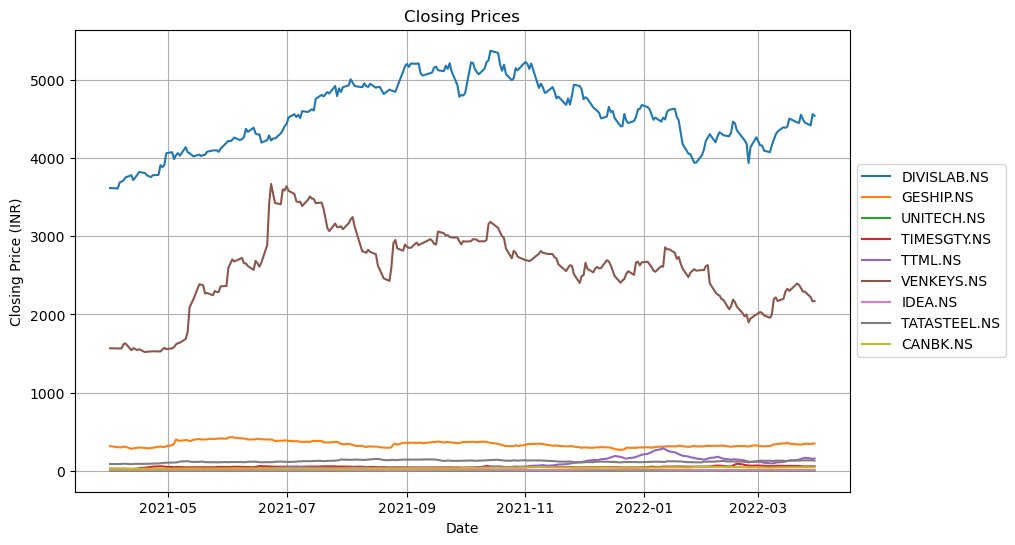

In [68]:
# Plotting
plt.figure(figsize=(10, 6))
for column in selected_daily_returns.columns:
    plt.plot(selected_daily_returns.index, selected_daily_returns[column], label=column)

plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

In [69]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [70]:
# Calculate discrete allocations using the greedy algorithm
discrete_allocations = greedy_allocation(cleaned_weights1, 5000)

# Print the discrete allocations
for stock, shares in discrete_allocations.items():
    print(f"Stock: {stock}, Shares: {shares}")

Stock: TTML.NS, Shares: 4606
Stock: TATASTEEL.NS, Shares: 292
Stock: GESHIP.NS, Shares: 101


In [71]:
latest_prices = get_latest_prices(selected_daily_returns)

da = DiscreteAllocation(cleaned_weights1, latest_prices, total_portfolio_value=10000)
allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: Rs.{:.2f}".format(leftover))

Discrete allocation: {'TTML.NS': 58, 'TATASTEEL.NS': 5}
Funds remaining: Rs.135.57


In [72]:
#Optimised portfolio Creation 
l_out = []

for i in range(0,20):
    l = []
    m = 3
    selected_stocks3 = attributes.groupby('Cluster').apply(lambda x: x.sample(m)).index.get_level_values(1)
    #print("Selected stocks for diversified portfolio:", selected_stocks1)
    l.append(selected_stocks3.values)
    # Calculate portfolio expected return and risk
    selected_daily_returns3 = pivoted_df_close[selected_stocks3]

    # Calculate expected returns and sample covariance matrix
    mu3 = expected_returns.mean_historical_return(selected_daily_returns3, frequency=247) #Number of trading days
    S3 = risk_models.sample_cov(selected_daily_returns3)

    # Optimize for maximal Sharpe ratio
    ef3 = EfficientFrontier(mu3, S3)
    raw_weights3 = ef3.max_sharpe()
    cleaned_weights3 = ef3.clean_weights()
    #ef.save_weights_to_file("weights.csv")  # saves to file
    #print(cleaned_weights)
    mv_performance2 = ef3.portfolio_performance(verbose=True)
    l.append(mv_performance2[0])
    l.append(mv_performance2[1])
    l.append(mv_performance2[2])
    l_out.append(l)

Expected annual return: 94.5%
Annual volatility: 29.1%
Sharpe Ratio: 3.18
Expected annual return: 142.3%
Annual volatility: 39.3%
Sharpe Ratio: 3.57
Expected annual return: 65.3%
Annual volatility: 25.0%
Sharpe Ratio: 2.54
Expected annual return: 69.3%
Annual volatility: 32.3%
Sharpe Ratio: 2.08
Expected annual return: 119.2%
Annual volatility: 42.7%
Sharpe Ratio: 2.75
Expected annual return: 81.8%
Annual volatility: 33.0%
Sharpe Ratio: 2.42
Expected annual return: 56.5%
Annual volatility: 21.4%
Sharpe Ratio: 2.54
Expected annual return: 102.1%
Annual volatility: 28.7%
Sharpe Ratio: 3.49
Expected annual return: 136.4%
Annual volatility: 32.7%
Sharpe Ratio: 4.11
Expected annual return: 87.3%
Annual volatility: 29.7%
Sharpe Ratio: 2.87
Expected annual return: 119.2%
Annual volatility: 35.3%
Sharpe Ratio: 3.32
Expected annual return: 330.6%
Annual volatility: 40.1%
Sharpe Ratio: 8.20
Expected annual return: 71.4%
Annual volatility: 28.3%
Sharpe Ratio: 2.46
Expected annual return: 156.4%
A

In [73]:
len(l_out)

20

In [74]:
df = pd.DataFrame(l_out, columns=['Portfolio Stocks', 'Expected Annual Return', 'Annual Volatility', 'Sharpe Ratio'])

In [75]:
df['Portfolio Stocks'][0]

array(['BAJAJ-AUTO.NS', 'ESABINDIA.NS', 'ONGC.NS', 'GUJALKALI.NS',
       'GENUSPOWER.NS', 'NAGAFERT.NS', 'PNB.NS', 'TATASTEEL.NS',
       'IDEA.NS'], dtype=object)

In [76]:
# Define a list of 20 portfolio names
portfolio_names = [
    'Portfolio 1', 'Portfolio 2', 'Portfolio 3', 'Portfolio 4', 'Portfolio 5',
    'Portfolio 6', 'Portfolio 7', 'Portfolio 8', 'Portfolio 9', 'Portfolio 10',
    'Portfolio 11', 'Portfolio 12', 'Portfolio 13', 'Portfolio 14', 'Portfolio 15',
    'Portfolio 16', 'Portfolio 17', 'Portfolio 18', 'Portfolio 19', 'Portfolio 20'
]

# Create a DataFrame from the list
df3 = pd.DataFrame(portfolio_names, columns=['Portfolio Name'])

In [77]:
#Just 20 porfolios have been generated for example run

# Merge the two data frames
df1 = pd.merge(df3, df, left_index=True, right_index=True)
df1

,Portfolio Name,Portfolio Stocks,Expected Annual Return,Annual Volatility,Sharpe Ratio
0,Portfolio 1,"[BAJAJ-AUTO.NS, ESABINDIA.NS, ONGC.NS, GUJALKA...",0.944805,0.290588,3.182533
1,Portfolio 2,"[IDFCFIRSTB.NS, COLPAL.NS, TATACONSUM.NS, KECL...",1.423463,0.393064,3.570570
2,Portfolio 3,"[ELGIEQUIP.NS, OIL.NS, ESCORTS.NS, SURYAROSNI....",0.653271,0.249758,2.535541
3,Portfolio 4,"[TATACONSUM.NS, KSB.NS, KTKBANK.NS, JKPAPER.NS...",0.692773,0.322858,2.083802
4,Portfolio 5,"[GODREJIND.NS, BAJAJ-AUTO.NS, AUROPHARMA.NS, B...",1.192133,0.426770,2.746525
5,Portfolio 6,"[ACC.NS, M&MFIN.NS, LUMAXIND.NS, PATANJALI.NS,...",0.818301,0.330002,2.419074
6,Portfolio 7,"[INFY.NS, TRENT.NS, MAHLOG.NS, ADANIENT.NS, IB...",0.564697,0.214240,2.542455
7,Portfolio 8,"[THERMAX.NS, CIPLA.NS, BIRLACORPN.NS, GODREJPR...",1.021320,0.286735,3.492151
8,Portfolio 9,"[ICICIBANK.NS, INDIAMART.NS, CRISIL.NS, SURYAR...",1.364385,0.327368,4.106653
9,Portfolio 10,"[WIPRO.NS, SHREECEM.NS, GRASIM.NS, ICIL.NS, ZE...",0.872948,0.297317,2.868820


In [78]:
dict_col = df1.to_dict(orient='records')
print(dict_col)

[{'Portfolio Name': 'Portfolio 1', 'Portfolio Stocks': array(['BAJAJ-AUTO.NS', 'ESABINDIA.NS', 'ONGC.NS', 'GUJALKALI.NS',
       'GENUSPOWER.NS', 'NAGAFERT.NS', 'PNB.NS', 'TATASTEEL.NS',
       'IDEA.NS'], dtype=object), 'Expected Annual Return': 0.9448052371895191, 'Annual Volatility': 0.29058778431184146, 'Sharpe Ratio': 3.1825330833490004}, {'Portfolio Name': 'Portfolio 2', 'Portfolio Stocks': array(['IDFCFIRSTB.NS', 'COLPAL.NS', 'TATACONSUM.NS', 'KECL.NS',
       'BAJAJHIND.NS', 'COSMOFIRST.NS', 'TATASTEEL.NS', 'YESBANK.NS',
       'CANBK.NS'], dtype=object), 'Expected Annual Return': 1.4234628888338958, 'Annual Volatility': 0.39306408080459204, 'Sharpe Ratio': 3.5705701878458176}, {'Portfolio Name': 'Portfolio 3', 'Portfolio Stocks': array(['ELGIEQUIP.NS', 'OIL.NS', 'ESCORTS.NS', 'SURYAROSNI.NS',
       'ADANIPOWER.NS', 'AMJLAND.NS', 'IDEA.NS', 'TATASTEEL.NS', 'PNB.NS'],
      dtype=object), 'Expected Annual Return': 0.6532705860712111, 'Annual Volatility': 0.24975758134460588, 'S

In [79]:
reference_portfolio1 = {'Portfolio Stocks': 'Reference Portfolio', 'Expected Annual Return': 0.30, 'Annual Volatility': 0.15, 'Sharpe Ratio': 3.5}

In [80]:
from sklearn.metrics.pairwise import cosine_similarity
# Define a function to calculate cosine similarity between two portfolios
def calculate_cosine_similarity(portfolio1, portfolio2):
    features1 = np.array([portfolio1['Expected Annual Return'], portfolio1['Annual Volatility'], portfolio1['Sharpe Ratio']]).reshape(1, -1)
    features2 = np.array([portfolio2['Expected Annual Return'], portfolio2['Annual Volatility'], portfolio2['Sharpe Ratio']]).reshape(1, -1)
    similarity = cosine_similarity(features1, features2)[0][0]
    return similarity

# Calculate similarity scores for all portfolios
similarity_scores = {}
for portfolio in dict_col:
    similarity_scores[portfolio['Portfolio Name']] = calculate_cosine_similarity(reference_portfolio1, portfolio)

# Rank portfolios based on their similarity scores
ranked_portfolios = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)

# Recommend similar portfolios to non-professional investors
print("Similar Portfolios Recommended to Non-Professional Investors:")
for portfolio, similarity_score in ranked_portfolios[:3]:  # Adjust the number of recommended portfolios as needed
    print(f"{portfolio}: Similarity Score = {similarity_score:.4f}")

Similar Portfolios Recommended to Non-Professional Investors:
Portfolio 7: Similarity Score = 0.9904
Portfolio 18: Similarity Score = 0.9859
Portfolio 3: Similarity Score = 0.9848


In [81]:
#### NEW SET OF STOCKS ####
#Selecting stocks Randomly
m = 3
selected_stocks7 = ['INFY.NS', 'TRENT.NS', 'MAHLOG.NS', 'ADANIENT.NS', 'IBREALEST.NS',
       'DCW.NS', 'IDEA.NS', 'CANBK.NS', 'YESBANK.NS']
#selected_stocks1 = attributes.groupby('Cluster').apply(lambda x: x.sample(m)).index.get_level_values(1)
print("Selected stocks for diversified portfolio:", selected_stocks7)

Selected stocks for diversified portfolio: ['INFY.NS', 'TRENT.NS', 'MAHLOG.NS', 'ADANIENT.NS', 'IBREALEST.NS', 'DCW.NS', 'IDEA.NS', 'CANBK.NS', 'YESBANK.NS']


In [83]:
# Calculate portfolio expected return and risk
selected_daily_returns7 = pivoted_df_close[selected_stocks7]

# Calculate expected returns and sample covariance matrix
mu = expected_returns.mean_historical_return(selected_daily_returns7, frequency=247) #Number of trading days
S = risk_models.sample_cov(selected_daily_returns7)
selected_daily_returns7

Ticker,INFY.NS,TRENT.NS,MAHLOG.NS,ADANIENT.NS,IBREALEST.NS,DCW.NS,IDEA.NS,CANBK.NS,YESBANK.NS
Date,,,,,,,,,
2021-04-01,1385.199951,750.849976,574.750000,1107.199951,88.300003,28.150000,10.00,31.270000,15.70
2021-04-05,1409.900024,729.450012,549.900024,1138.250000,84.150002,27.000000,9.55,29.350000,15.50
2021-04-06,1411.050049,703.650024,542.000000,1225.400024,81.400002,28.150000,9.70,29.600000,15.60
2021-04-07,1430.199951,722.049988,538.099976,1165.550049,84.599998,30.000000,9.75,29.930000,15.60
2021-04-08,1439.849976,729.750000,535.700012,1162.500000,84.650002,31.150000,9.40,29.440001,15.55
...,...,...,...,...,...,...,...,...,...
2022-03-24,1886.699951,1276.849976,458.549988,1832.800049,105.250000,42.150002,10.15,45.130001,12.75
2022-03-25,1876.550049,1261.300049,446.149994,1867.000000,104.949997,40.900002,10.10,45.060001,12.70
2022-03-28,1873.900024,1279.550049,463.399994,1909.699951,101.099998,42.150002,9.95,45.740002,12.55


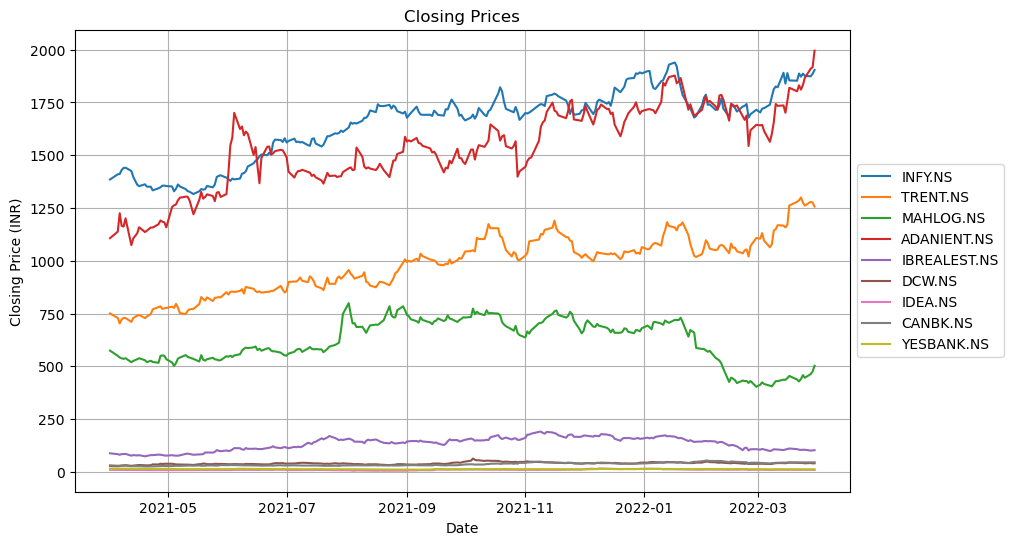

In [84]:
# Plotting
plt.figure(figsize=(10, 6))
for column in selected_daily_returns7.columns:
    plt.plot(selected_daily_returns7.index, selected_daily_returns7[column], label=column)

plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

In [85]:
m = 3
selected_stocks18 = ['TCS.NS', 'KOTAKBANK.NS', 'ELGIEQUIP.NS', 'ZEEL.NS',
       'BAJFINANCE.NS', 'DCMFINSERV.NS', 'PNB.NS', 'CANBK.NS', 'IDEA.NS']

# Calculate portfolio expected return and risk
selected_daily_returns18 = pivoted_df_close[selected_stocks18]

# Calculate expected returns and sample covariance matrix
mu = expected_returns.mean_historical_return(selected_daily_returns18, frequency=247) #Number of trading days
S = risk_models.sample_cov(selected_daily_returns18)
selected_daily_returns18

Ticker,TCS.NS,KOTAKBANK.NS,ELGIEQUIP.NS,ZEEL.NS,BAJFINANCE.NS,DCMFINSERV.NS,PNB.NS,CANBK.NS,IDEA.NS
Date,,,,,,,,,
2021-04-01,3165.000000,1804.550049,197.199997,209.250000,5272.149902,1.25,38.200001,31.270000,10.00
2021-04-05,3238.899902,1759.199951,194.550003,202.149994,4962.500000,1.25,36.950001,29.350000,9.55
2021-04-06,3264.699951,1768.300049,199.699997,199.899994,4993.100098,1.30,37.049999,29.600000,9.70
2021-04-07,3271.399902,1792.000000,197.949997,200.399994,5077.100098,1.35,37.599998,29.930000,9.75
2021-04-08,3317.350098,1783.250000,204.350006,201.949997,5029.500000,1.40,37.450001,29.440001,9.40
...,...,...,...,...,...,...,...,...,...
2022-03-24,3749.850098,1714.150024,285.100006,298.899994,6997.549805,3.75,35.549999,45.130001,10.15
2022-03-25,3707.449951,1722.250000,277.799988,295.100006,6973.500000,3.75,35.400002,45.060001,10.10
2022-03-28,3707.699951,1725.199951,272.149994,289.899994,7001.399902,3.60,35.650002,45.740002,9.95


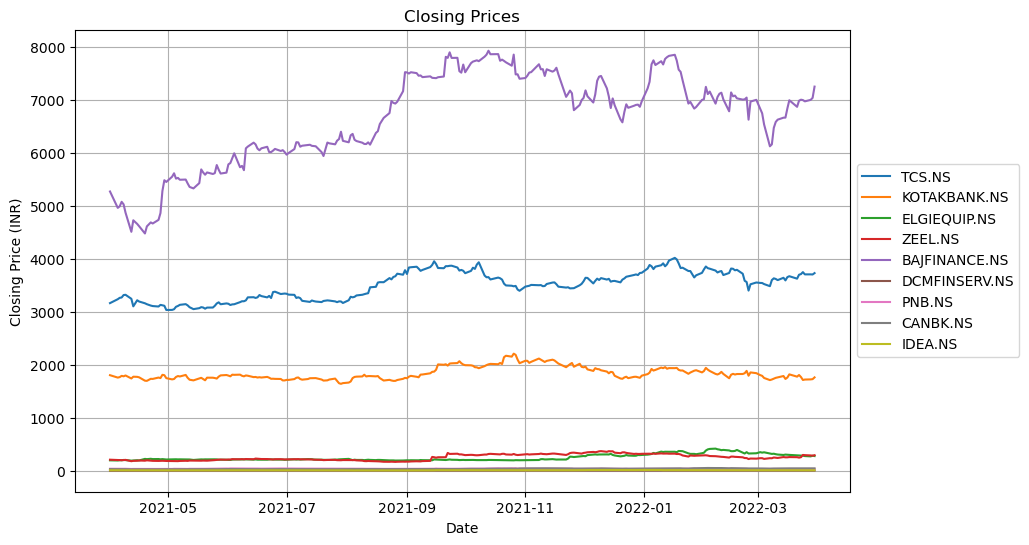

In [86]:
# Plotting
plt.figure(figsize=(10, 6))
for column in selected_daily_returns18.columns:
    plt.plot(selected_daily_returns18.index, selected_daily_returns18[column], label=column)

plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

In [95]:
m = 3
selected_stocks3 = ['ELGIEQUIP.NS', 'OIL.NS', 'ESCORTS.NS', 'SURYAROSNI.NS',
       'ADANIPOWER.NS', 'AMJLAND.NS', 'IDEA.NS', 'TATASTEEL.NS', 'PNB.NS']

# Calculate portfolio expected return and risk
selected_daily_returns3 = pivoted_df_close[selected_stocks3]

# Calculate expected returns and sample covariance matrix
mu = expected_returns.mean_historical_return(selected_daily_returns3, frequency=247) #Number of trading days
S = risk_models.sample_cov(selected_daily_returns3)
selected_daily_returns3

Ticker,ELGIEQUIP.NS,OIL.NS,ESCORTS.NS,SURYAROSNI.NS,ADANIPOWER.NS,AMJLAND.NS,IDEA.NS,TATASTEEL.NS,PNB.NS
Date,,,,,,,,,
2021-04-01,197.199997,124.000000,1274.050049,178.875000,89.300003,22.400000,10.00,86.305000,38.200001
2021-04-05,194.550003,122.349998,1235.349976,176.250000,93.750000,23.100000,9.55,86.775002,36.950001
2021-04-06,199.699997,122.699997,1222.050049,176.550003,98.400002,23.049999,9.70,86.285004,37.049999
2021-04-07,197.949997,123.949997,1239.900024,188.074997,99.949997,22.900000,9.75,87.485001,37.599998
2021-04-08,204.350006,122.199997,1270.750000,188.625000,97.400002,23.500000,9.40,91.839996,37.450001
...,...,...,...,...,...,...,...,...,...
2022-03-24,285.100006,235.449997,1858.099976,214.125000,132.149994,32.400002,10.15,135.054993,35.549999
2022-03-25,277.799988,234.649994,1798.699951,214.250000,143.199997,31.250000,10.10,133.895004,35.400002
2022-03-28,272.149994,233.600006,1698.750000,207.375000,152.250000,30.750000,9.95,133.895004,35.650002


In [96]:
# Optimize for maximal Sharpe ratio
ef3 = EfficientFrontier(mu, S)
raw_weights3 = ef3.max_sharpe()
cleaned_weights3 = ef3.clean_weights()
ef3.save_weights_to_file("weights3.csv")  # saves to file
print(cleaned_weights3)
mv_performance3 = ef3.portfolio_performance(verbose=True)

OrderedDict([('ELGIEQUIP.NS', 0.02294), ('OIL.NS', 0.40699), ('ESCORTS.NS', 0.26367), ('SURYAROSNI.NS', 0.0), ('ADANIPOWER.NS', 0.16685), ('AMJLAND.NS', 0.02629), ('IDEA.NS', 0.0), ('TATASTEEL.NS', 0.11326), ('PNB.NS', 0.0)])
Expected annual return: 65.3%
Annual volatility: 25.0%
Sharpe Ratio: 2.54


In [97]:
exact_mv_return3 = exact_return(list(cleaned_weights3.values()), mu)
# Compare expected returns from optimization with exact returns
print("Expected vs Exact Returns for Mean-Variance Optimization:")
print("Expected Return:", mv_performance[0])
print("Exact Return:", exact_mv_return3)

Expected vs Exact Returns for Mean-Variance Optimization:
Expected Return: 1.5683221858588674
Exact Return: 0.6532713331734017


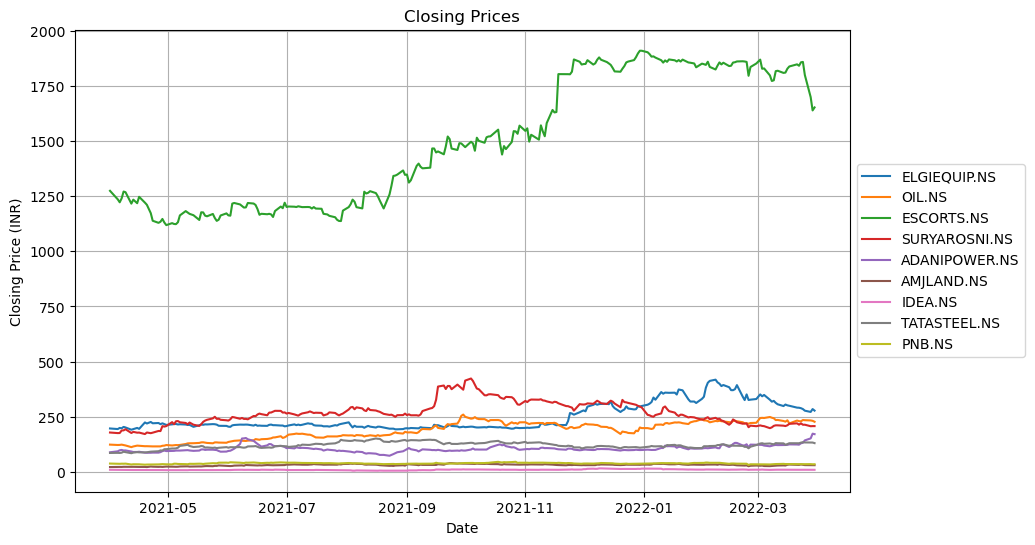

In [88]:
# Plotting
plt.figure(figsize=(10, 6))
for column in selected_daily_returns3.columns:
    plt.plot(selected_daily_returns3.index, selected_daily_returns3[column], label=column)

plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

### Validation

In [89]:
pivoted_df_close_val = validation_stock_data.reset_index().pivot(index= 'Date', columns='Ticker', values='Close')
pivoted_df_close_val

Ticker,ABB.NS,ABBOTINDIA.NS,ACC.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ADANIPOWER.NS,AEGISCHEM.NS,AMJLAND.NS,ANSALAPI.NS,...,VEDL.NS,VENKEYS.NS,VESUVIUS.NS,VOLTAS.NS,VSTIND.NS,WHIRLPOOL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS,ZEEMEDIA.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-01,2114.300049,17512.400391,2151.000000,2043.650024,1945.099976,785.750000,203.449997,219.500000,31.900000,14.000000,...,405.799988,2261.350098,1031.599976,1260.849976,3093.149902,1603.650024,601.799988,12.650000,299.799988,17.400000
2022-04-04,2130.550049,17549.599609,2119.449951,2065.850098,2110.449951,818.549988,211.949997,217.899994,31.850000,14.400000,...,421.450012,2284.899902,1038.650024,1276.750000,3097.100098,1633.300049,605.599976,13.100000,302.750000,18.250000
2022-04-05,2207.550049,17628.250000,2149.649902,2139.850098,2189.800049,848.049988,233.100006,215.250000,30.950001,14.600000,...,418.899994,2336.949951,1050.500000,1315.000000,3138.850098,1675.449951,599.150024,13.000000,300.149994,18.000000
2022-04-06,2209.449951,17676.150391,2145.500000,2160.000000,2197.399902,849.849976,244.750000,220.399994,31.650000,14.750000,...,432.600006,2330.050049,1062.449951,1322.000000,3129.800049,1647.300049,593.549988,14.700000,290.899994,17.700001
2022-04-07,2192.149902,18164.250000,2136.699951,2099.050049,2166.000000,817.400024,232.550003,227.949997,34.000000,15.450000,...,425.500000,2284.050049,1053.050049,1301.199951,3131.250000,1659.000000,580.849976,15.550000,284.750000,19.450001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-23,3124.649902,17853.750000,2488.899902,3674.300049,2323.850098,913.799988,385.600006,276.350006,29.549999,22.500000,...,279.549988,2081.649902,1603.599976,900.799988,3230.800049,1655.699951,394.350006,16.200001,260.950012,16.200001
2022-09-26,3002.199951,17586.199219,2378.250000,3586.199951,2210.350098,863.400024,366.500000,262.700012,27.350000,22.250000,...,264.299988,2009.250000,1566.500000,882.400024,3185.449951,1632.550049,394.799988,15.500000,257.850006,16.450001
2022-09-27,3032.750000,18080.849609,2373.449951,3559.100098,2146.300049,844.200012,372.549988,264.299988,27.450001,21.900000,...,262.200012,2011.949951,1562.949951,904.250000,3166.399902,1623.150024,398.399994,15.750000,263.000000,16.600000


In [102]:
# Calculate portfolio 3 expected return and risk
selected_daily_returns3v = pivoted_df_close_val[selected_stocks3]

# Calculate expected returns and sample covariance matrix
mu = expected_returns.mean_historical_return(selected_daily_returns3v, frequency=247) #Number of trading days
S = risk_models.sample_cov(selected_daily_returns3v)
selected_daily_returns3v

Ticker,ELGIEQUIP.NS,OIL.NS,ESCORTS.NS,SURYAROSNI.NS,ADANIPOWER.NS,AMJLAND.NS,IDEA.NS,TATASTEEL.NS,PNB.NS
Date,,,,,,,,,
2022-04-01,294.000000,238.850006,1697.949951,211.425003,203.449997,31.900000,10.10,131.710007,36.349998
2022-04-04,310.600006,237.149994,1765.050049,219.750000,211.949997,31.850000,10.25,134.190002,36.900002
2022-04-05,319.700012,237.899994,1864.300049,229.125000,233.100006,30.950001,10.35,134.490005,36.950001
2022-04-06,309.049988,237.250000,1889.400024,225.324997,244.750000,31.650000,10.80,137.074997,37.599998
2022-04-07,304.149994,237.949997,1715.250000,221.024994,232.550003,34.000000,10.90,134.949997,37.450001
...,...,...,...,...,...,...,...,...,...
2022-09-23,449.950012,184.899994,2076.649902,241.375000,385.600006,29.549999,8.95,104.300003,38.150002
2022-09-26,421.450012,179.000000,2000.099976,228.925003,366.500000,27.350000,9.00,99.849998,36.000000
2022-09-27,410.149994,175.149994,2026.900024,226.875000,372.549988,27.450001,9.15,97.650002,36.700001


In [103]:
# Optimize for maximal Sharpe ratio
ef3v = EfficientFrontier(mu, S)
raw_weights3v = ef3v.max_sharpe()
cleaned_weights3v = ef3v.clean_weights()
ef3v.save_weights_to_file("weights3v.csv")  # saves to file
print(cleaned_weights3v)
mv_performance3v = ef3v.portfolio_performance(verbose=True)

OrderedDict([('ELGIEQUIP.NS', 0.13458), ('OIL.NS', 0.0), ('ESCORTS.NS', 0.0), ('SURYAROSNI.NS', 0.0), ('ADANIPOWER.NS', 0.86542), ('AMJLAND.NS', 0.0), ('IDEA.NS', 0.0), ('TATASTEEL.NS', 0.0), ('PNB.NS', 0.0)])
Expected annual return: 213.8%
Annual volatility: 51.5%
Sharpe Ratio: 4.11


In [104]:
exact_mv_return3v = exact_return(list(cleaned_weights3v.values()), mu)

In [110]:
## Actual Returns we get from portfolio 3

print("Exact Return for Mean-Variance Portfolio (validation data):", exact_mv_return3v)                     ##Future data
print("Expected Return for Mean-Variance Portfolio(trained data):", df1['Expected Annual Return'][2])       ##Historical Data

Exact Return for Mean-Variance Portfolio (validation data): 2.138401493208527
Expected Return for Mean-Variance Portfolio(trained data): 0.6532705860712111


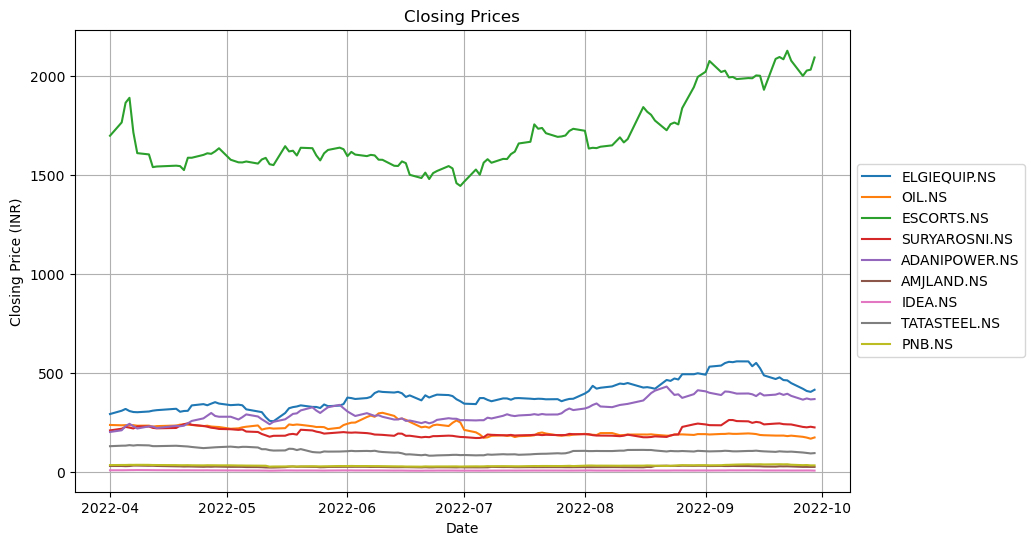

In [117]:
# Plotting
plt.figure(figsize=(10, 6))
for column in selected_daily_returns3v.columns:
    plt.plot(selected_daily_returns3v.index, selected_daily_returns3v[column], label=column)

plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

In [111]:
selected_daily_returns7v = pivoted_df_close_val[selected_stocks7]

# Calculate expected returns and sample covariance matrix
mu = expected_returns.mean_historical_return(selected_daily_returns7v, frequency=247) #Number of trading days
S = risk_models.sample_cov(selected_daily_returns7v)
selected_daily_returns7v

Ticker,INFY.NS,TRENT.NS,MAHLOG.NS,ADANIENT.NS,IBREALEST.NS,DCW.NS,IDEA.NS,CANBK.NS,YESBANK.NS
Date,,,,,,,,,
2022-04-01,1903.550049,1268.449951,506.299988,2043.650024,112.000000,42.799999,10.10,47.990002,12.650000
2022-04-04,1882.949951,1294.650024,504.950012,2065.850098,117.750000,43.950001,10.25,48.259998,13.100000
2022-04-05,1861.099976,1319.199951,526.750000,2139.850098,116.300003,44.450001,10.35,48.590000,13.000000
2022-04-06,1828.849976,1328.300049,527.549988,2160.000000,115.849998,43.900002,10.80,49.570000,14.700000
2022-04-07,1811.000000,1307.750000,519.500000,2099.050049,113.099998,43.400002,10.90,49.330002,15.550000
...,...,...,...,...,...,...,...,...,...
2022-09-23,1365.449951,1433.650024,530.900024,3674.300049,76.500000,54.799999,8.95,45.820000,16.200001
2022-09-26,1380.250000,1408.949951,503.399994,3586.199951,72.599998,51.250000,9.00,43.430000,15.500000
2022-09-27,1393.550049,1396.050049,507.149994,3559.100098,72.199997,52.099998,9.15,42.849998,15.750000


In [112]:
# Optimize for maximal Sharpe ratio
ef7v = EfficientFrontier(mu, S)
raw_weights7v = ef7v.max_sharpe()
cleaned_weights7v = ef7v.clean_weights()
ef7v.save_weights_to_file("weights7v.csv")  # saves to file
print(cleaned_weights7v)
mv_performance7v = ef7v.portfolio_performance(verbose=True)

OrderedDict([('INFY.NS', 0.0), ('TRENT.NS', 0.0), ('MAHLOG.NS', 0.0), ('ADANIENT.NS', 0.98823), ('IBREALEST.NS', 0.0), ('DCW.NS', 0.0), ('IDEA.NS', 0.0), ('CANBK.NS', 0.0), ('YESBANK.NS', 0.01177)])
Expected annual return: 188.0%
Annual volatility: 35.2%
Sharpe Ratio: 5.28


In [113]:
exact_mv_return7v = exact_return(list(cleaned_weights7v.values()), mu)

## Actual Returns we get from portfolio 3
print("Exact Return for Mean-Variance Portfolio (validation data):", exact_mv_return7v)                     ##Future data
print("Expected Return for Mean-Variance Portfolio(trained data):", df1['Expected Annual Return'][6])       ##Historical Data

Exact Return for Mean-Variance Portfolio (validation data): 1.880224064616854
Expected Return for Mean-Variance Portfolio(trained data): 0.5646967525212179


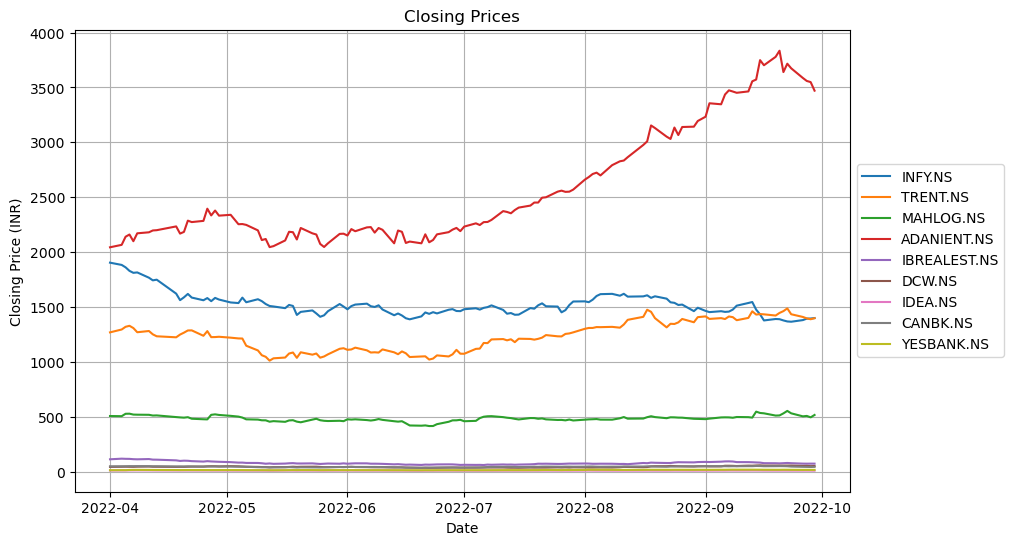

In [118]:
# Plotting
plt.figure(figsize=(10, 6))
for column in selected_daily_returns7v.columns:
    plt.plot(selected_daily_returns7v.index, selected_daily_returns7v[column], label=column)

plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

In [114]:
selected_daily_returns18v = pivoted_df_close_val[selected_stocks18]

# Calculate expected returns and sample covariance matrix
mu = expected_returns.mean_historical_return(selected_daily_returns18v, frequency=247) #Number of trading days
S = risk_models.sample_cov(selected_daily_returns18v)
selected_daily_returns18v

Ticker,TCS.NS,KOTAKBANK.NS,ELGIEQUIP.NS,ZEEL.NS,BAJFINANCE.NS,DCMFINSERV.NS,PNB.NS,CANBK.NS,IDEA.NS
Date,,,,,,,,,
2022-04-01,3758.750000,1776.650024,294.000000,299.799988,7408.100098,3.50,36.349998,47.990002,10.10
2022-04-04,3770.350098,1836.050049,310.600006,302.750000,7490.649902,3.50,36.900002,48.259998,10.25
2022-04-05,3814.800049,1802.199951,319.700012,300.149994,7388.450195,3.50,36.950001,48.590000,10.35
2022-04-06,3755.350098,1779.400024,309.049988,290.899994,7346.950195,3.50,37.599998,49.570000,10.80
2022-04-07,3684.149902,1766.449951,304.149994,284.750000,7290.200195,3.35,37.450001,49.330002,10.90
...,...,...,...,...,...,...,...,...,...
2022-09-23,2982.050049,1862.699951,449.950012,260.950012,7507.149902,10.65,38.150002,45.820000,8.95
2022-09-26,2994.399902,1829.000000,421.450012,257.850006,7259.500000,10.15,36.000000,43.430000,9.00
2022-09-27,3017.449951,1799.300049,410.149994,263.000000,7242.850098,9.65,36.700001,42.849998,9.15


In [115]:
# Optimize for maximal Sharpe ratio
ef18v = EfficientFrontier(mu, S)
raw_weights18v = ef18v.max_sharpe()
cleaned_weights18v = ef18v.clean_weights()
ef18v.save_weights_to_file("weights18v.csv")  # saves to file
print(cleaned_weights18v)
mv_performance18v = ef18v.portfolio_performance(verbose=True)

OrderedDict([('TCS.NS', 0.0), ('KOTAKBANK.NS', 0.03143), ('ELGIEQUIP.NS', 0.05522), ('ZEEL.NS', 0.0), ('BAJFINANCE.NS', 0.0), ('DCMFINSERV.NS', 0.91335), ('PNB.NS', 0.0), ('CANBK.NS', 0.0), ('IDEA.NS', 0.0)])
Expected annual return: 489.3%
Annual volatility: 54.1%
Sharpe Ratio: 9.01


In [116]:
exact_mv_return18v = exact_return(list(cleaned_weights18v.values()), mu)

## Actual Returns we get from portfolio 3
print("Exact Return for Mean-Variance Portfolio (validation data):", exact_mv_return18v)                     ##Future data
print("Expected Return for Mean-Variance Portfolio(trained data):", df1['Expected Annual Return'][17])       ##Historical Data

Exact Return for Mean-Variance Portfolio (validation data): 4.893233650305085
Expected Return for Mean-Variance Portfolio(trained data): 1.0290288420799092


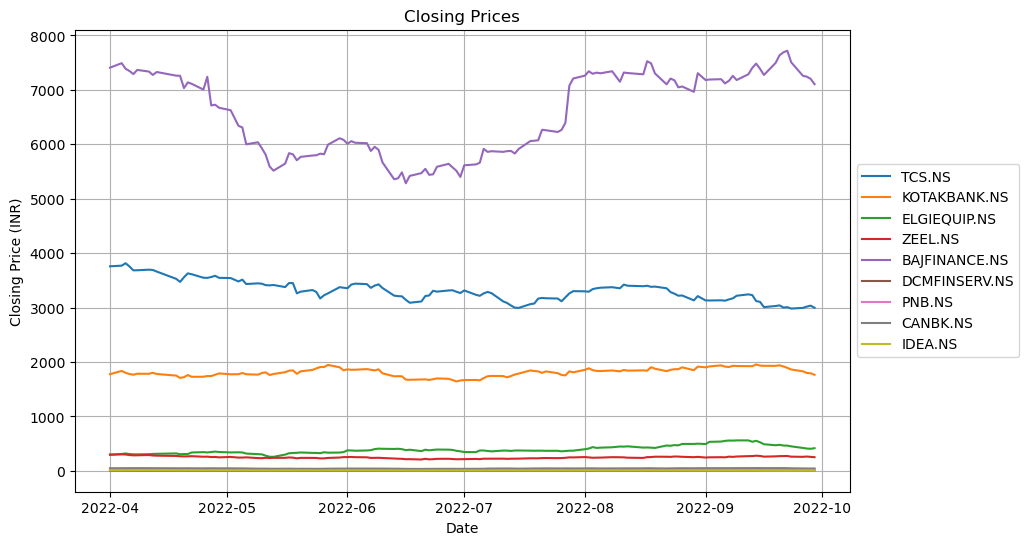

In [119]:
# Plotting
plt.figure(figsize=(10, 6))
for column in selected_daily_returns18v.columns:
    plt.plot(selected_daily_returns18v.index, selected_daily_returns18v[column], label=column)

plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

#### Example Portfolio 1 from research paper

In [129]:
selected_stocks_ex1 = ['BAJAJHIND.NS', 'CONSOFINVT.NS', 'ELGIEQUIP.NS', 'ESABINDIA.NS',
       'INGERRAND.NS', 'MAHSEAMLES.NS', 'NCC.NS', 'TATACONSUM.NS', 'TORNTPOWER.NS']

selected_daily_returns_ex1 = pivoted_df_close[selected_stocks_ex1]

# Calculate expected returns and sample covariance matrix
mu = expected_returns.mean_historical_return(selected_daily_returns_ex1, frequency=247) #Number of trading days
S = risk_models.sample_cov(selected_daily_returns_ex1)
selected_daily_returns_ex1

Ticker,BAJAJHIND.NS,CONSOFINVT.NS,ELGIEQUIP.NS,ESABINDIA.NS,INGERRAND.NS,MAHSEAMLES.NS,NCC.NS,TATACONSUM.NS,TORNTPOWER.NS
Date,,,,,,,,,
2021-04-01,6.40,58.349998,197.199997,1830.800049,697.900024,142.074997,81.099998,650.150024,427.549988
2021-04-05,6.25,57.250000,194.550003,1791.000000,693.849976,138.649994,78.349998,644.950012,416.100006
2021-04-06,6.20,57.299999,199.699997,1800.800049,715.650024,139.675003,78.550003,674.549988,418.100006
2021-04-07,6.50,57.950001,197.949997,1798.150024,720.599976,140.074997,79.000000,665.750000,421.700012
2021-04-08,6.75,59.000000,204.350006,1828.250000,727.099976,143.250000,80.750000,670.700012,422.500000
...,...,...,...,...,...,...,...,...,...
2022-03-24,15.00,144.449997,285.100006,3174.199951,1606.300049,280.075012,60.849998,740.500000,494.399994
2022-03-25,14.65,143.649994,277.799988,3086.100098,1580.949951,278.899994,60.599998,733.349976,485.950012
2022-03-28,14.25,140.350006,272.149994,3013.649902,1619.349976,267.424988,59.299999,741.250000,490.450012


In [130]:
# Optimize for maximal Sharpe ratio
ef_ex1 = EfficientFrontier(mu, S)
raw_weights_ex1 = ef_ex1.max_sharpe()
cleaned_weights_ex1 = ef_ex1.clean_weights()
ef_ex1.save_weights_to_file("weights_ex1.csv")  # saves to file
print(cleaned_weights_ex1)
mv_performance_ex1 = ef_ex1.portfolio_performance(verbose=True)

OrderedDict([('BAJAJHIND.NS', 0.09833), ('CONSOFINVT.NS', 0.16407), ('ELGIEQUIP.NS', 0.0), ('ESABINDIA.NS', 0.12761), ('INGERRAND.NS', 0.35086), ('MAHSEAMLES.NS', 0.25913), ('NCC.NS', 0.0), ('TATACONSUM.NS', 0.0), ('TORNTPOWER.NS', 0.0)])
Expected annual return: 118.4%
Annual volatility: 26.6%
Sharpe Ratio: 4.38


In [131]:
exact_mv_return_ex1 = exact_return(list(cleaned_weights_ex1.values()), mu)

## Actual Returns we get from portfolio 3
print("Exact Return for Mean-Variance Portfolio (validation data):", exact_mv_return_ex1)
print("Expected Return for Mean-Variance Portfolio(trained data):", mv_performance_ex1[0])

Exact Return for Mean-Variance Portfolio (validation data): 1.1841698405928358
Expected Return for Mean-Variance Portfolio(trained data): 1.1841669233803156


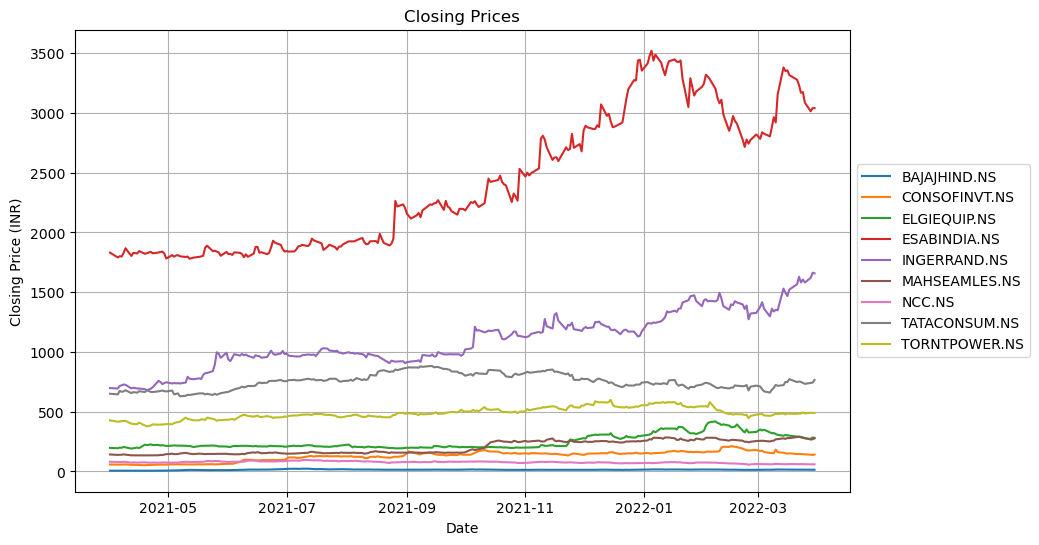

In [132]:
# Plotting
plt.figure(figsize=(10, 6))
for column in selected_daily_returns_ex1.columns:
    plt.plot(selected_daily_returns_ex1.index, selected_daily_returns_ex1[column], label=column)

plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

In [133]:
selected_stocks_ex1v = ['BAJAJHIND.NS', 'CONSOFINVT.NS', 'ELGIEQUIP.NS', 'ESABINDIA.NS',
       'INGERRAND.NS', 'MAHSEAMLES.NS', 'NCC.NS', 'TATACONSUM.NS', 'TORNTPOWER.NS']

selected_daily_returns_ex1v = pivoted_df_close_val[selected_stocks_ex1v]

# Calculate expected returns and sample covariance matrix
mu = expected_returns.mean_historical_return(selected_daily_returns_ex1v, frequency=247) #Number of trading days
S = risk_models.sample_cov(selected_daily_returns_ex1v)
selected_daily_returns_ex1v

Ticker,BAJAJHIND.NS,CONSOFINVT.NS,ELGIEQUIP.NS,ESABINDIA.NS,INGERRAND.NS,MAHSEAMLES.NS,NCC.NS,TATACONSUM.NS,TORNTPOWER.NS
Date,,,,,,,,,
2022-04-01,14.90,157.550003,294.000000,3055.699951,1646.550049,276.500000,64.949997,789.799988,502.500000
2022-04-04,15.60,158.699997,310.600006,3126.850098,1637.349976,286.450012,71.000000,788.099976,509.049988
2022-04-05,15.85,159.449997,319.700012,3150.300049,1624.699951,284.600006,70.050003,806.650024,533.200012
2022-04-06,16.60,156.899994,309.049988,3145.199951,1599.199951,292.250000,69.099998,809.250000,540.900024
2022-04-07,18.00,157.100006,304.149994,3144.649902,1613.400024,285.250000,67.150002,804.900024,537.349976
...,...,...,...,...,...,...,...,...,...
2022-09-23,10.95,142.149994,449.950012,3227.800049,2023.800049,401.975006,70.949997,781.549988,521.750000
2022-09-26,10.35,141.300003,421.450012,3170.600098,2042.400024,376.424988,67.550003,780.849976,494.600006
2022-09-27,10.55,142.649994,410.149994,3133.350098,2105.649902,368.875000,69.699997,797.849976,504.000000


In [134]:
# Optimize for maximal Sharpe ratio
ef_ex1v = EfficientFrontier(mu, S)
raw_weights_ex1v = ef_ex1v.max_sharpe()
cleaned_weights_ex1v = ef_ex1v.clean_weights()
ef_ex1v.save_weights_to_file("weights_ex1v.csv")  # saves to file
print(cleaned_weights_ex1v)
mv_performance_ex1v = ef_ex1v.portfolio_performance(verbose=True)

OrderedDict([('BAJAJHIND.NS', 0.0), ('CONSOFINVT.NS', 0.0), ('ELGIEQUIP.NS', 0.16299), ('ESABINDIA.NS', 0.0), ('INGERRAND.NS', 0.36361), ('MAHSEAMLES.NS', 0.4734), ('NCC.NS', 0.0), ('TATACONSUM.NS', 0.0), ('TORNTPOWER.NS', 0.0)])
Expected annual return: 81.3%
Annual volatility: 26.1%
Sharpe Ratio: 3.04


In [135]:
exact_mv_return_ex1v = exact_return(list(cleaned_weights_ex1v.values()), mu)

## Actual Returns we get from portfolio 3
print("Exact Return for Mean-Variance Portfolio (validation data):", exact_mv_return_ex1v)
print("Expected Return for Mean-Variance Portfolio(trained data):", mv_performance_ex1v[0])

Exact Return for Mean-Variance Portfolio (validation data): 0.8130270331275503
Expected Return for Mean-Variance Portfolio(trained data): 0.8130256552896614


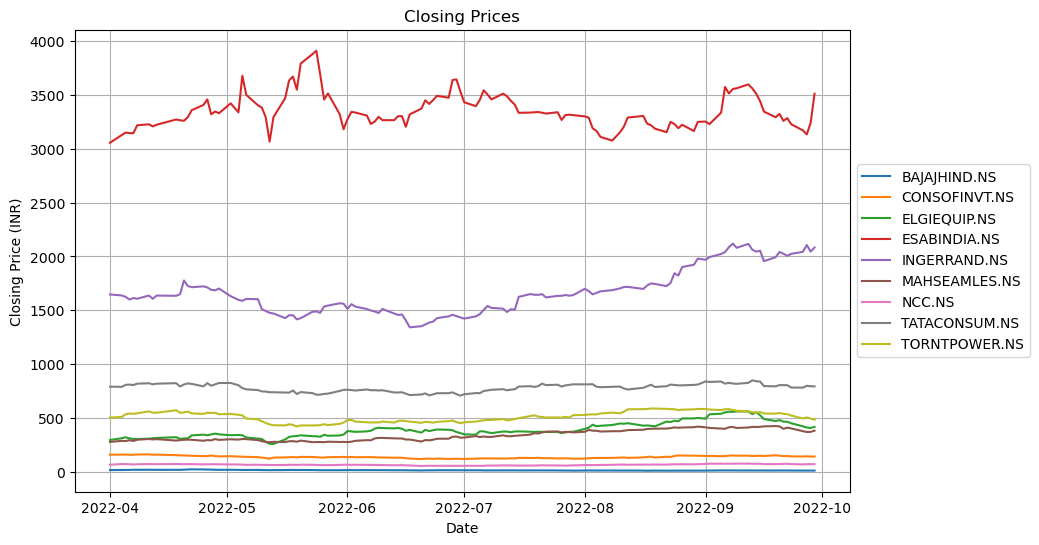

In [136]:
# Plotting
plt.figure(figsize=(10, 6))
for column in selected_daily_returns_ex1v.columns:
    plt.plot(selected_daily_returns_ex1v.index, selected_daily_returns_ex1v[column], label=column)

plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

#### Example Portfolio 2 from research paper

In [121]:
selected_stocks_ex = ['BASF.NS', 'MARICO.NS', 'SILINV.NS', 'KOTAKBANK.NS',
       'BRITANNIA.NS', 'HEG.NS', 'PGEL.NS', 'DEEPAKFERT.NS', 'PRIMESECU.NS']

selected_daily_returns_ex = pivoted_df_close[selected_stocks_ex]

# Calculate expected returns and sample covariance matrix
mu = expected_returns.mean_historical_return(selected_daily_returns_ex, frequency=247) #Number of trading days
S = risk_models.sample_cov(selected_daily_returns_ex)
selected_daily_returns_ex

Ticker,BASF.NS,MARICO.NS,SILINV.NS,KOTAKBANK.NS,BRITANNIA.NS,HEG.NS,PGEL.NS,DEEPAKFERT.NS,PRIMESECU.NS
Date,,,,,,,,,
2021-04-01,2136.899902,407.250000,194.149994,1804.550049,3618.500000,1580.900024,390.350006,234.550003,43.549999
2021-04-05,2034.949951,402.450012,184.300003,1759.199951,3700.350098,1537.900024,370.850006,225.300003,42.799999
2021-04-06,2101.649902,403.000000,190.050003,1768.300049,3730.600098,1818.099976,368.000000,225.600006,43.349998
2021-04-07,2094.949951,408.000000,187.500000,1792.000000,3808.550049,2152.949951,364.299988,239.699997,44.500000
2021-04-08,2094.649902,414.649994,187.850006,1783.250000,3816.750000,2366.399902,382.500000,268.750000,46.200001
...,...,...,...,...,...,...,...,...,...
2022-03-24,2931.449951,482.399994,347.100006,1714.150024,3103.850098,1313.099976,695.299988,552.549988,97.000000
2022-03-25,2918.600098,478.100006,352.899994,1722.250000,3094.500000,1371.949951,707.599976,531.049988,97.599998
2022-03-28,2955.050049,474.700012,341.899994,1725.199951,3094.800049,1362.400024,720.349976,518.250000,93.849998


In [122]:
# Optimize for maximal Sharpe ratio
ef_ex = EfficientFrontier(mu, S)
raw_weights_ex = ef_ex.max_sharpe()
cleaned_weights_ex = ef_ex.clean_weights()
ef_ex.save_weights_to_file("weights_ex.csv")  # saves to file
print(cleaned_weights_ex)
mv_performance_ex = ef_ex.portfolio_performance(verbose=True)

OrderedDict([('BASF.NS', 0.12128), ('MARICO.NS', 0.0), ('SILINV.NS', 0.08588), ('KOTAKBANK.NS', 0.0), ('BRITANNIA.NS', 0.0), ('HEG.NS', 0.0), ('PGEL.NS', 0.10731), ('DEEPAKFERT.NS', 0.36002), ('PRIMESECU.NS', 0.32551)])
Expected annual return: 105.9%
Annual volatility: 34.7%
Sharpe Ratio: 3.00


In [123]:
exact_mv_return_ex = exact_return(list(cleaned_weights_ex.values()), mu)

## Actual Returns we get from portfolio 3
print("Exact Return for Mean-Variance Portfolio (validation data):", exact_mv_return_ex)
print("Expected Return for Mean-Variance Portfolio(trained data):", mv_performance_ex[0])

Exact Return for Mean-Variance Portfolio (validation data): 1.0585673321447582
Expected Return for Mean-Variance Portfolio(trained data): 1.0585656328023187


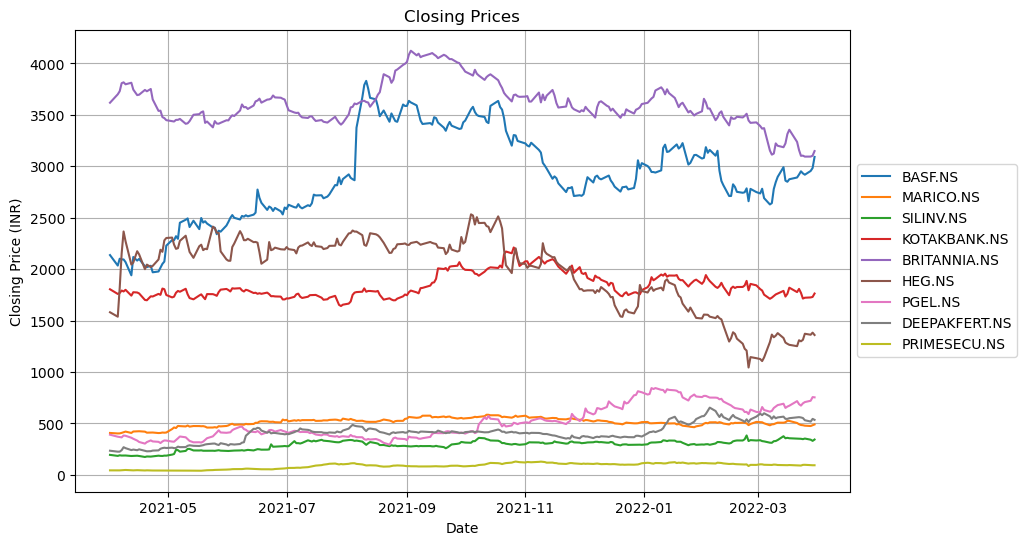

In [124]:
# Plotting
plt.figure(figsize=(10, 6))
for column in selected_daily_returns_ex.columns:
    plt.plot(selected_daily_returns_ex.index, selected_daily_returns_ex[column], label=column)

plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

In [125]:
selected_stocks_ex = ['BASF.NS', 'MARICO.NS', 'SILINV.NS', 'KOTAKBANK.NS',
       'BRITANNIA.NS', 'HEG.NS', 'PGEL.NS', 'DEEPAKFERT.NS', 'PRIMESECU.NS']

selected_daily_returns_ex1 = pivoted_df_close_val[selected_stocks_ex]

# Calculate expected returns and sample covariance matrix
mu = expected_returns.mean_historical_return(selected_daily_returns_ex1, frequency=247) #Number of trading days
S = risk_models.sample_cov(selected_daily_returns_ex1)
selected_daily_returns_ex1

Ticker,BASF.NS,MARICO.NS,SILINV.NS,KOTAKBANK.NS,BRITANNIA.NS,HEG.NS,PGEL.NS,DEEPAKFERT.NS,PRIMESECU.NS
Date,,,,,,,,,
2022-04-01,3031.000000,518.250000,342.649994,1776.650024,3230.649902,1387.099976,749.700012,569.349976,95.900002
2022-04-04,2997.800049,530.099976,358.100006,1836.050049,3270.000000,1411.699951,750.599976,569.099976,99.000000
2022-04-05,2997.649902,543.900024,361.799988,1802.199951,3303.399902,1406.500000,774.400024,584.650024,99.699997
2022-04-06,2992.899902,521.299988,367.500000,1779.400024,3282.500000,1393.449951,764.150024,579.150024,101.449997
2022-04-07,2918.949951,512.000000,360.600006,1766.449951,3294.100098,1376.449951,762.049988,573.400024,102.849998
...,...,...,...,...,...,...,...,...,...
2022-09-23,2854.800049,542.950012,317.850006,1862.699951,3796.699951,1103.599976,1045.400024,875.700012,103.449997
2022-09-26,2881.949951,526.250000,304.000000,1829.000000,3787.500000,1051.199951,999.000000,833.150024,101.849998
2022-09-27,2907.250000,536.450012,309.950012,1799.300049,3824.149902,1055.900024,1041.650024,853.000000,99.300003


In [126]:
# Optimize for maximal Sharpe ratio
ef_ex1 = EfficientFrontier(mu, S)
raw_weights_ex1 = ef_ex1.max_sharpe()
cleaned_weights_ex1 = ef_ex1.clean_weights()
ef_ex1.save_weights_to_file("weights_ex1.csv")  # saves to file
print(cleaned_weights_ex1)
mv_performance_ex1 = ef_ex1.portfolio_performance(verbose=True)

OrderedDict([('BASF.NS', 0.0), ('MARICO.NS', 0.0), ('SILINV.NS', 0.0), ('KOTAKBANK.NS', 0.0), ('BRITANNIA.NS', 0.47454), ('HEG.NS', 0.0), ('PGEL.NS', 0.13288), ('DEEPAKFERT.NS', 0.39259), ('PRIMESECU.NS', 0.0)])
Expected annual return: 82.4%
Annual volatility: 25.9%
Sharpe Ratio: 3.10


In [127]:
exact_mv_return_ex1 = exact_return(list(cleaned_weights_ex1.values()), mu)

## Actual Returns we get from portfolio 3
print("Exact Return for Mean-Variance Portfolio (validation data):", exact_mv_return_ex1)
print("Expected Return for Mean-Variance Portfolio(trained data):", mv_performance_ex1[0])

Exact Return for Mean-Variance Portfolio (validation data): 0.8237074931924435
Expected Return for Mean-Variance Portfolio(trained data): 0.8236981978124368


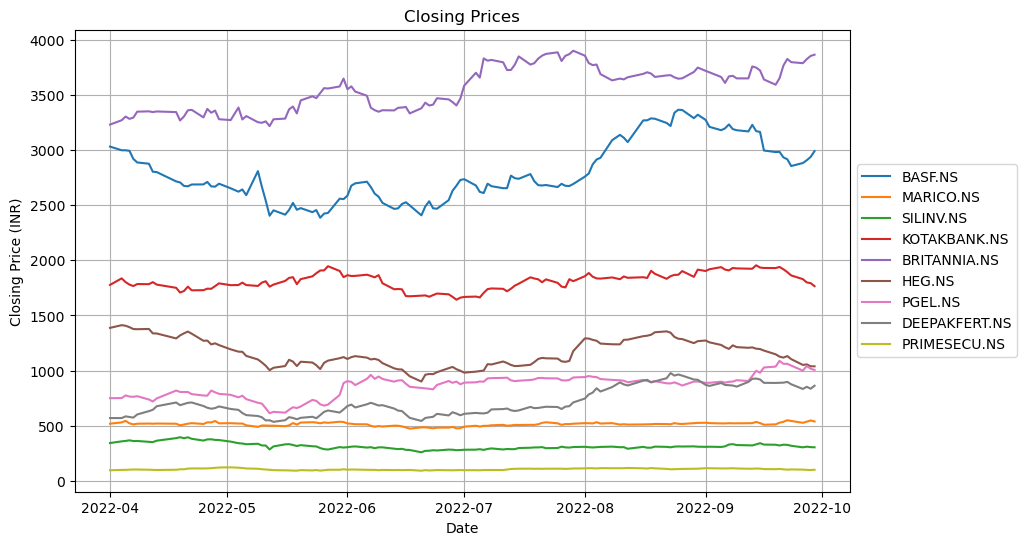

In [128]:
# Plotting
plt.figure(figsize=(10, 6))
for column in selected_daily_returns_ex1.columns:
    plt.plot(selected_daily_returns_ex1.index, selected_daily_returns_ex1[column], label=column)

plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()